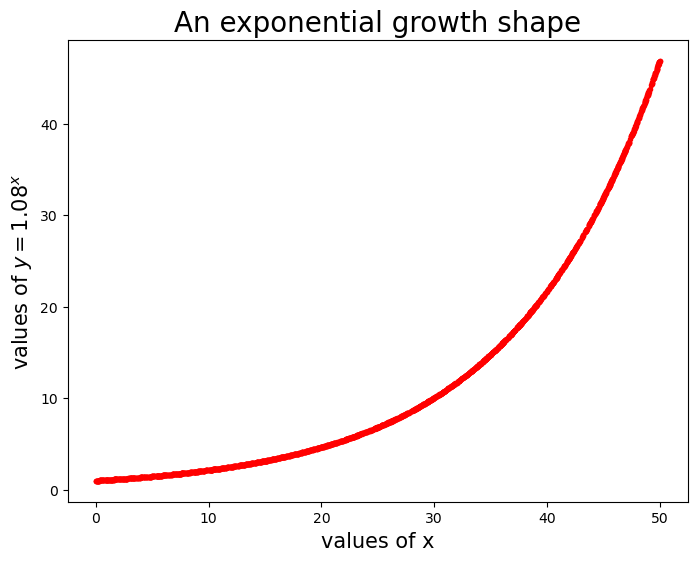

In [1]:
import torch 
torch.manual_seed(0)
observations = 2048 
train_data = torch.zeros((observations, 2))
train_data[:,0] = 50 * torch.rand(observations)
train_data[:, 1] = 1.08 ** train_data[:,0]
import matplotlib.pyplot as plt

fig=plt.figure(dpi=100,figsize=(8,6))
plt.plot(train_data[:,0],train_data[:,1],".",c="r")    #A
plt.xlabel("values of x",fontsize=15)
plt.ylabel("values of $y=1.08^x$",fontsize=15)    #B
plt.title("An exponential growth shape",fontsize=20)    #C
plt.show()

In [2]:
from torch.utils.data import DataLoader
batch_size = 128 
train_loader = DataLoader(
    train_data, 
    batch_size=batch_size,
    shuffle=True
                          )
batch0 = next(iter(train_loader))
print(batch0)

tensor([[41.9333, 25.2099],
        [ 8.0561,  1.8589],
        [22.2487,  5.5416],
        [49.9585, 46.7522],
        [ 8.7647,  1.9631],
        [ 3.0979,  1.2692],
        [26.0517,  7.4259],
        [38.2393, 18.9716],
        [37.1300, 17.4191],
        [45.0543, 32.0541],
        [ 8.7989,  1.9683],
        [20.4796,  4.8362],
        [46.7506, 36.5243],
        [21.8242,  5.3635],
        [11.2329,  2.3738],
        [40.3307, 22.2845],
        [47.0477, 37.3691],
        [47.6369, 39.1026],
        [16.2331,  3.4880],
        [11.7535,  2.4709],
        [12.8855,  2.6958],
        [20.6749,  4.9095],
        [ 4.6602,  1.4314],
        [26.3385,  7.5916],
        [31.7039, 11.4727],
        [45.5565, 33.3172],
        [41.3369, 24.0788],
        [26.8584,  7.9015],
        [14.9879,  3.1692],
        [33.7039, 13.3817],
        [47.7350, 39.3988],
        [31.7714, 11.5324],
        [ 7.4853,  1.7790],
        [14.5973,  3.0754],
        [31.4056, 11.2122],
        [35.8166, 15

In [3]:
import torch.nn as nn 
device = "cuda" if torch.cuda.is_available() else "cpu"
D = nn.Sequential(
    nn.Linear(2, 256),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(64, 1),
    nn.Sigmoid()
).to(device)

In [4]:
G = nn.Sequential(
    nn.Linear(2,16),
    nn.ReLU(),
    nn.Linear(16,32),
    nn.ReLU(),
    nn.Linear(32,2)
).to(device)

In [6]:
loss_fn = nn.BCELoss()
lr = 0.0005
optimD=torch.optim.Adam(D.parameters(), lr=lr)
optimG =torch.optim.Adam(G.parameters(), lr=lr)

mse = nn.MSELoss()
def performance(fake_samples):
    real = 1.08 ** fake_samples[:,0]
    mseloss = mse(fake_samples[:,1],real)
    return mseloss

class EarlyStop:
    def __init__(self, patience=1000):    #A
        self.patience = patience
        self.steps = 0
        self.min_gdif = float('inf')
    def stop(self, gdif):    #B
        if gdif < self.min_gdif:    #C
            self.min_gdif = gdif
            self.steps = 0
        elif gdif >= self.min_gdif:
            self.steps += 1
        if self.steps >= self.patience:    #D
            return True
        else:
            return False

stopper=EarlyStop()

In [6]:
real_labels = torch.ones((batch_size,1))
real_labels = real_labels.to(device)
fake_labels = torch.zeros((batch_size,1))
fake_labels = fake_labels.to(device)

at epoch 1, G loss: 0.7845621744791667, D loss 0.8412465413411458


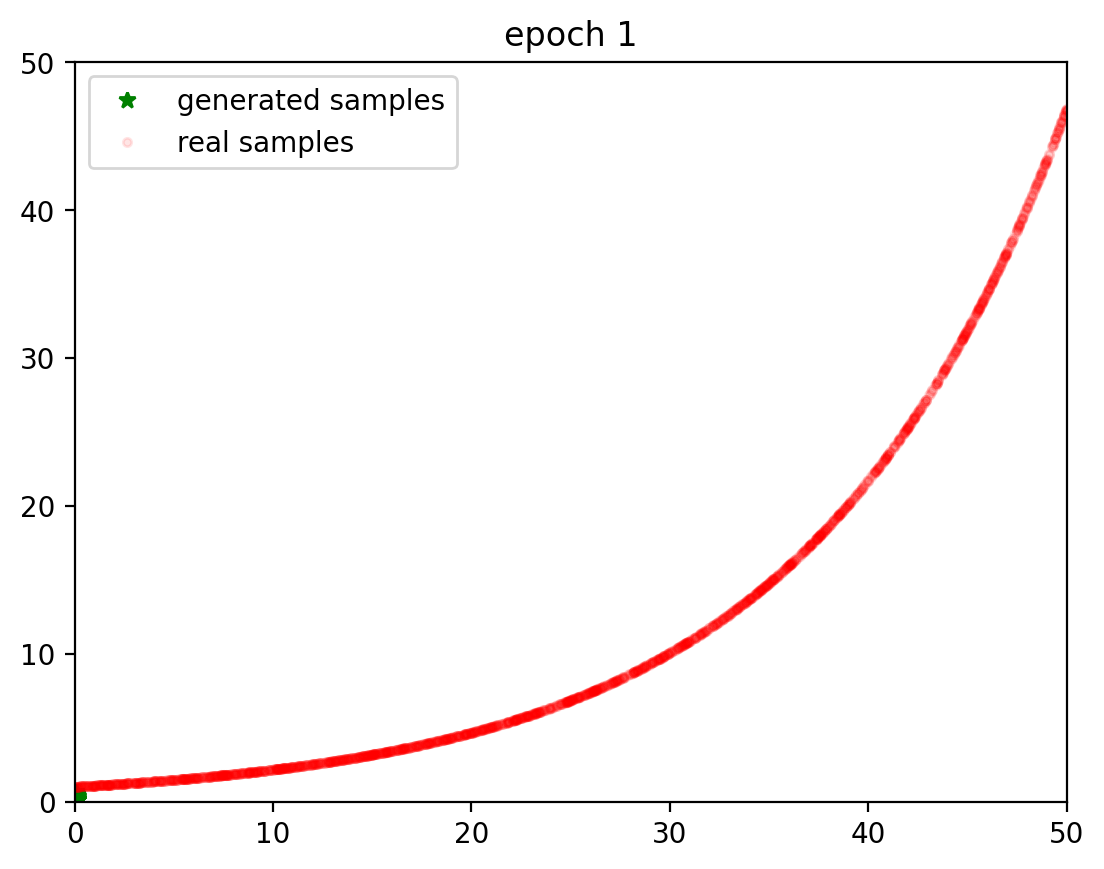

at epoch 25, G loss: 2.5251032511393228, D loss 0.40411583582560223


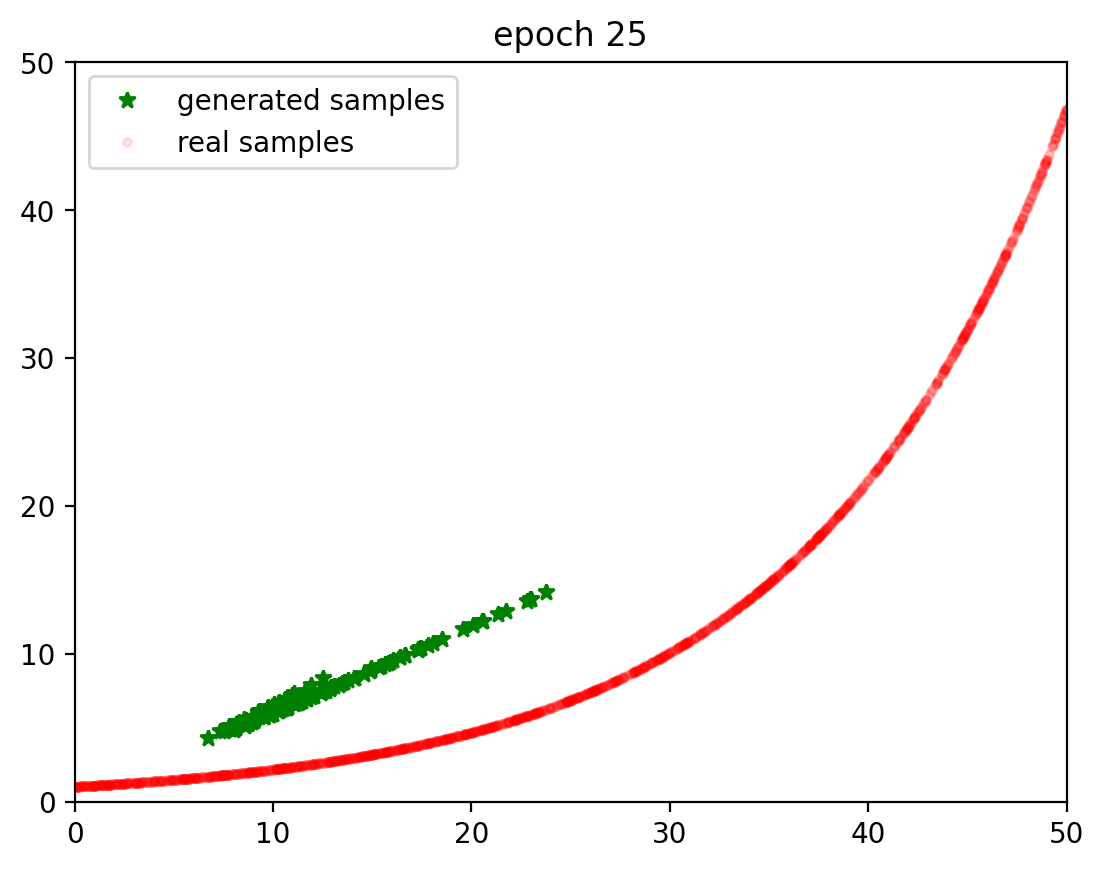

at epoch 50, G loss: 2.3375272115071613, D loss 0.4783791542053223


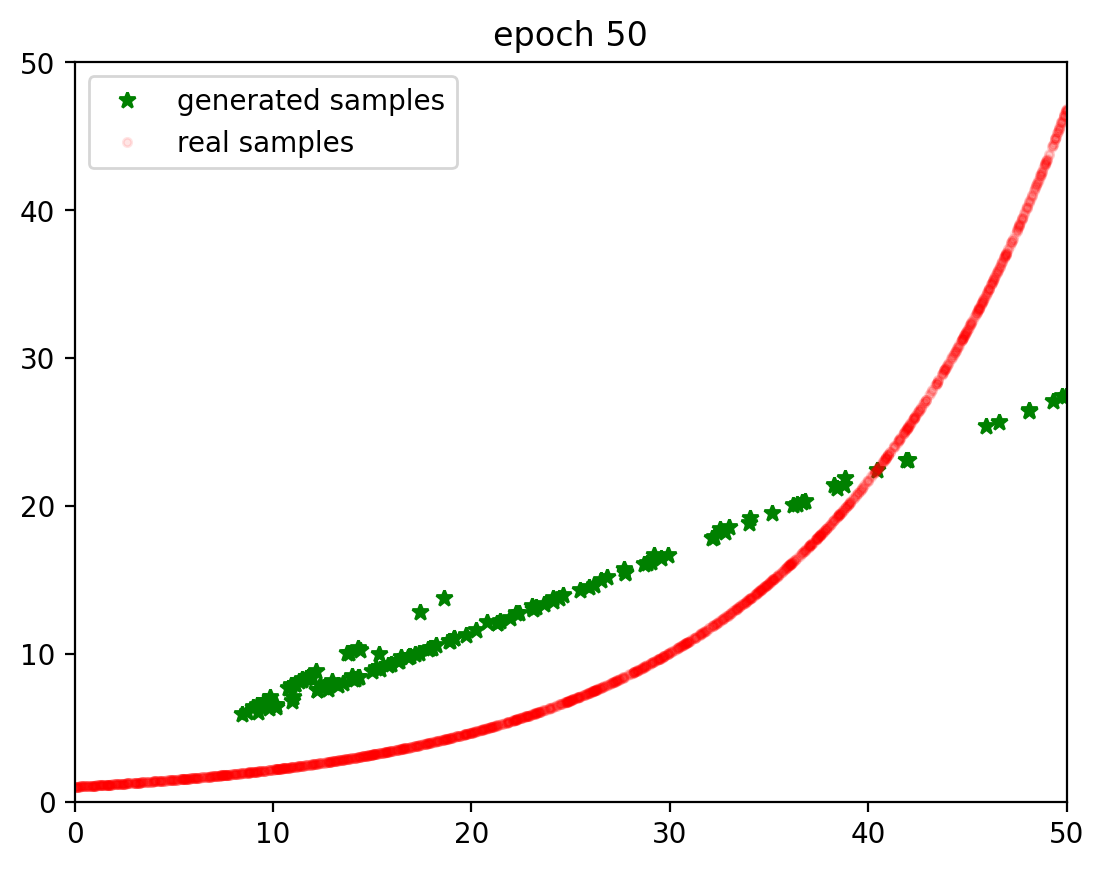

at epoch 75, G loss: 3.264135487874349, D loss 0.47920125325520835


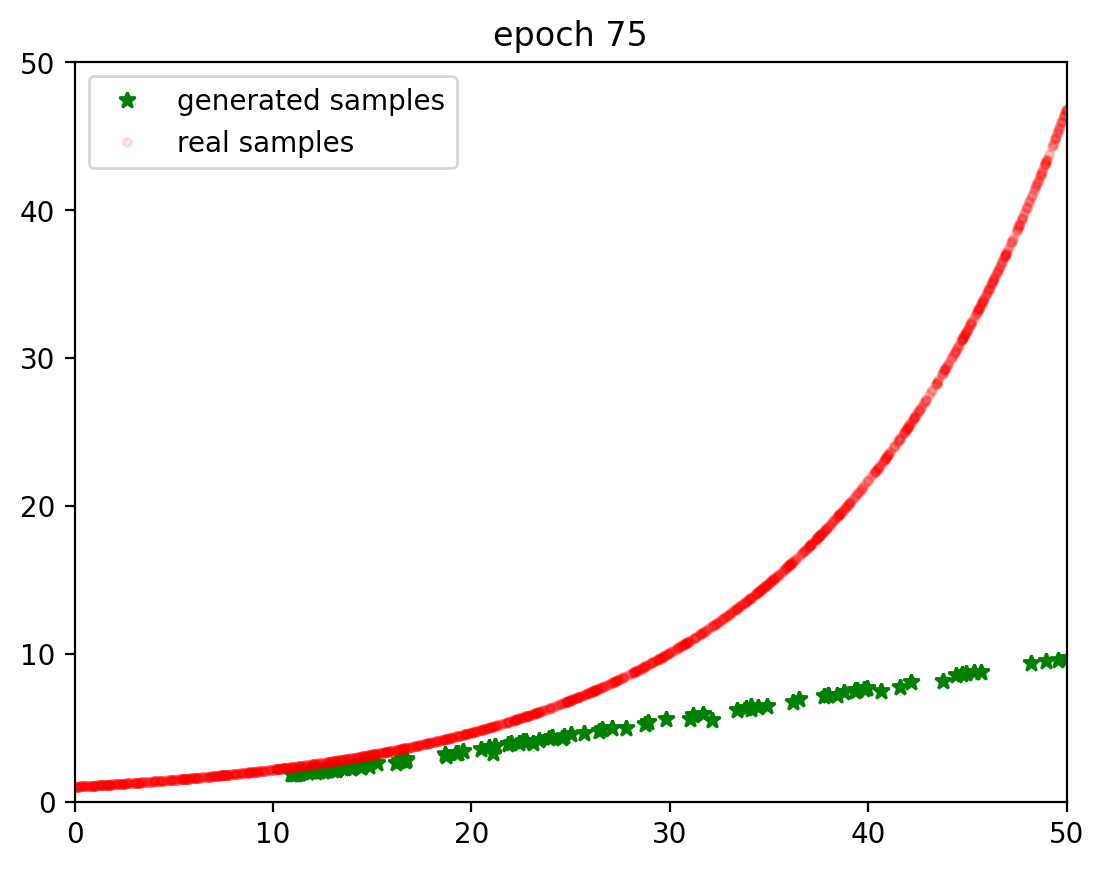

at epoch 100, G loss: 6.060581461588542, D loss 0.15007688204447428


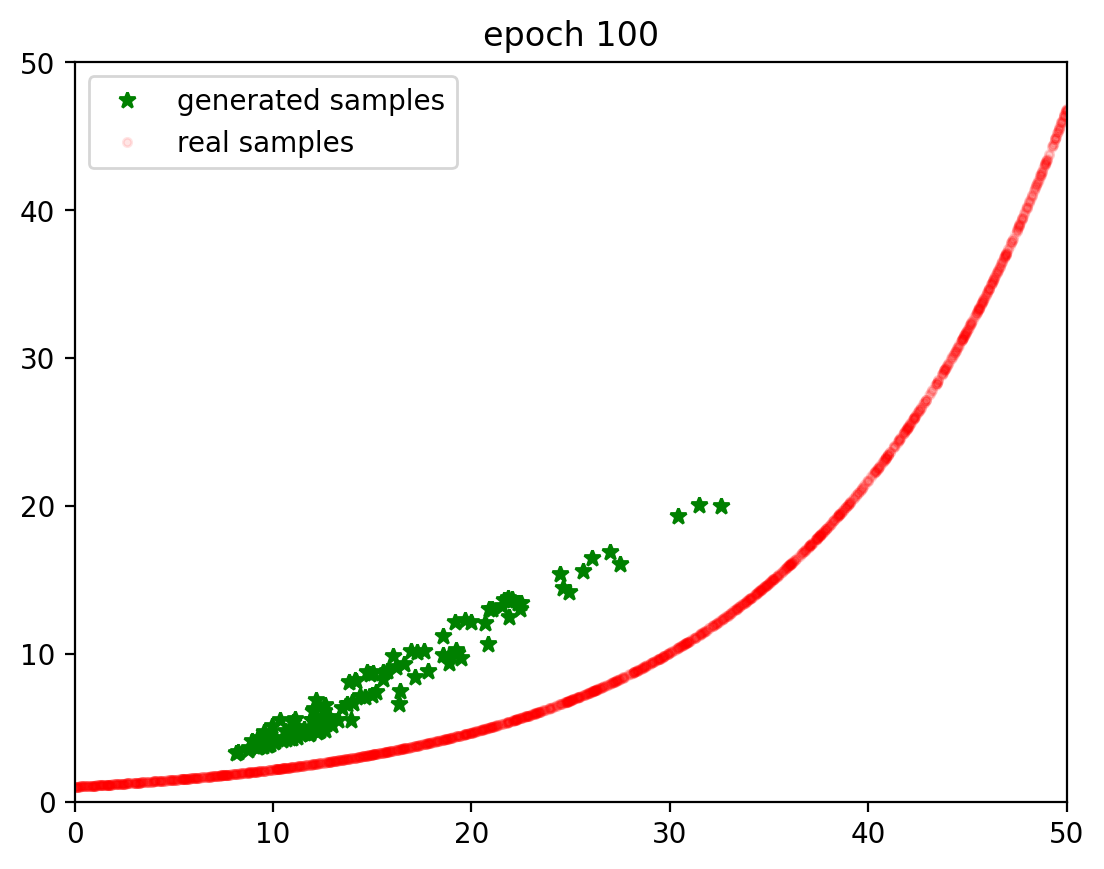

at epoch 125, G loss: 3.26053949991862, D loss 0.6545767466227214


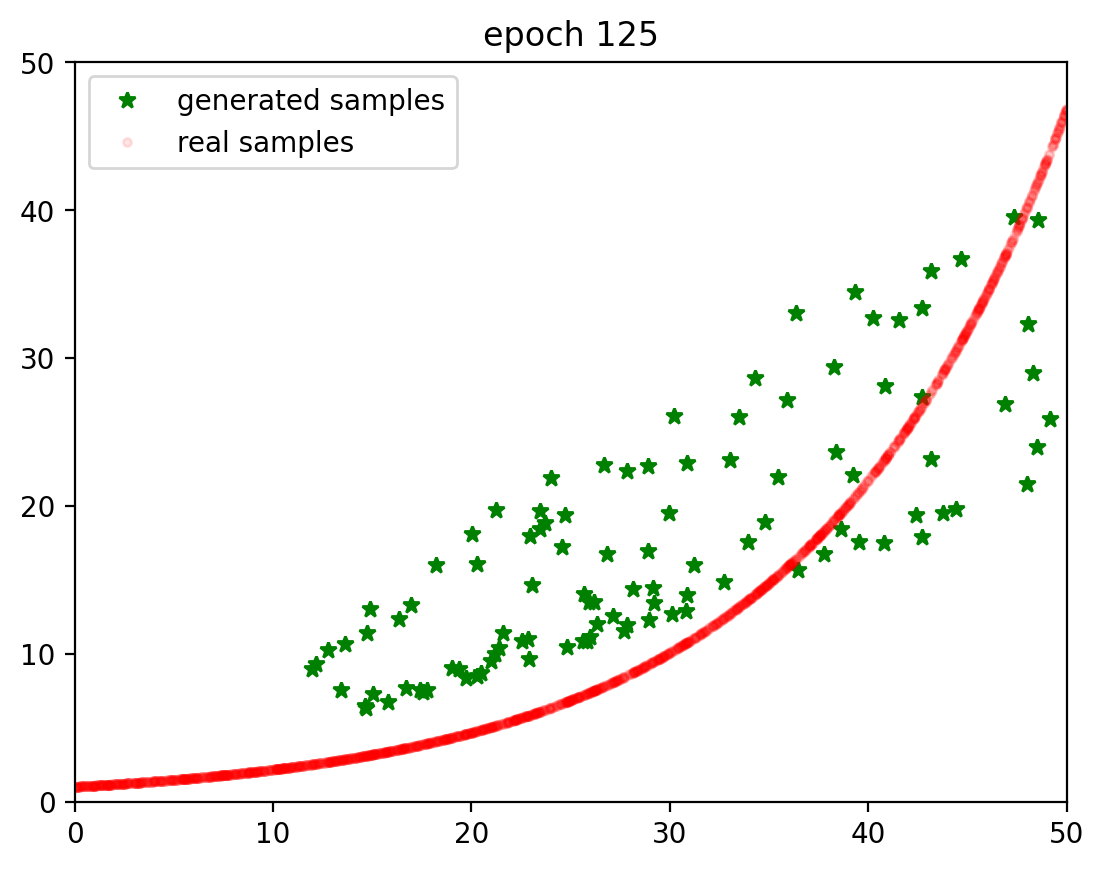

at epoch 150, G loss: 2.8616205851236978, D loss 0.6005038579305013


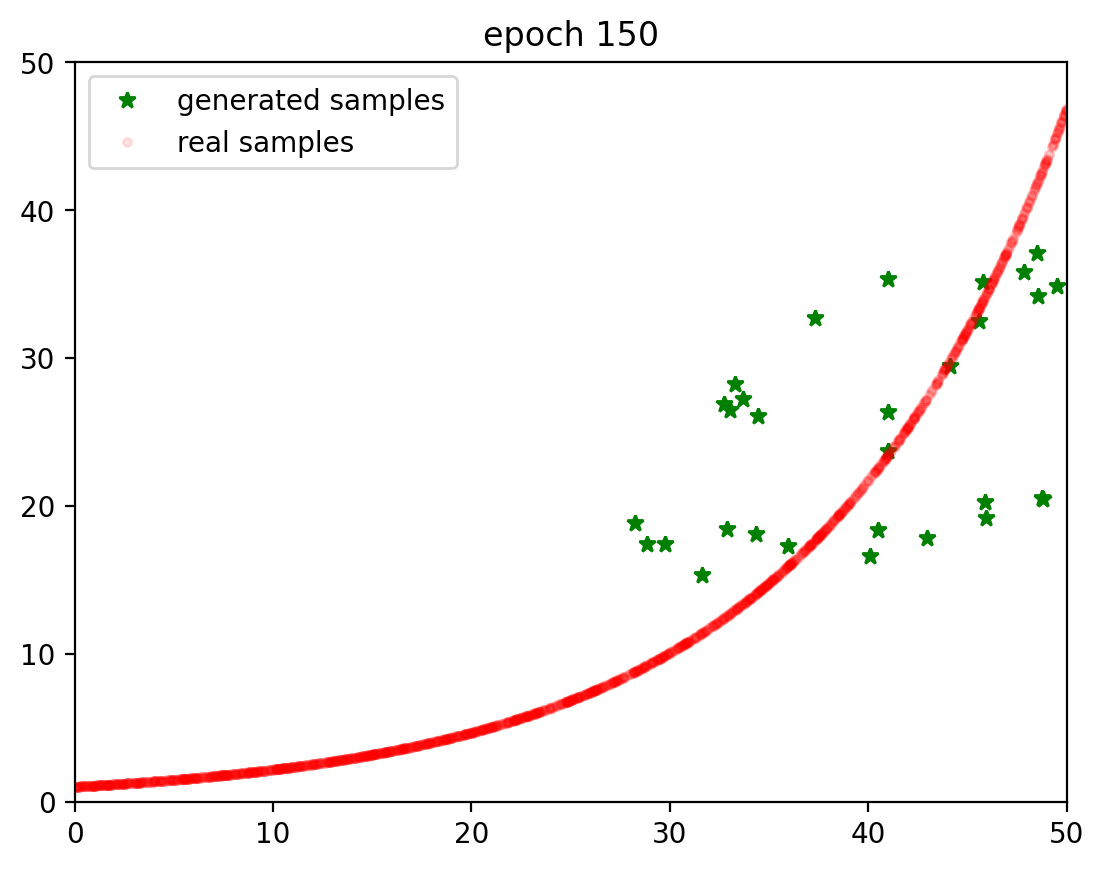

at epoch 175, G loss: 7.156270853678385, D loss 0.2651870568593343


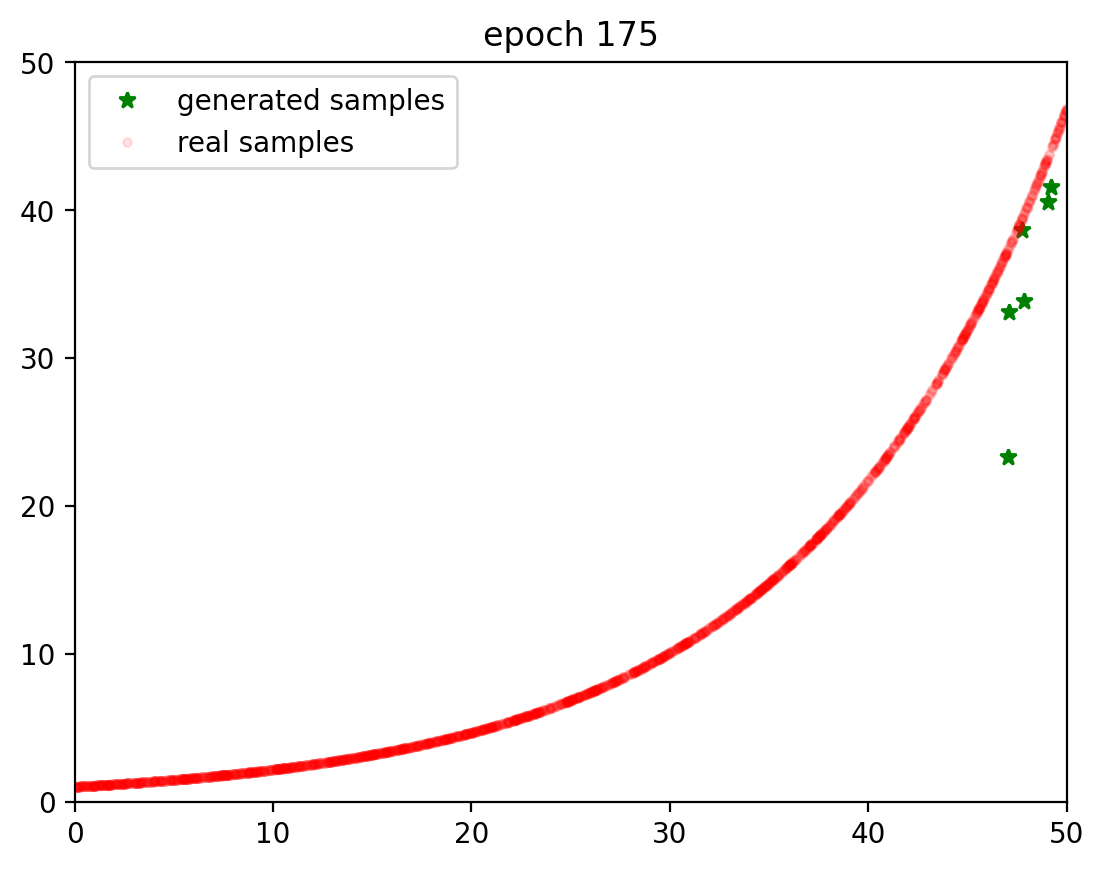

at epoch 200, G loss: 8.87020263671875, D loss 0.10859285195668539


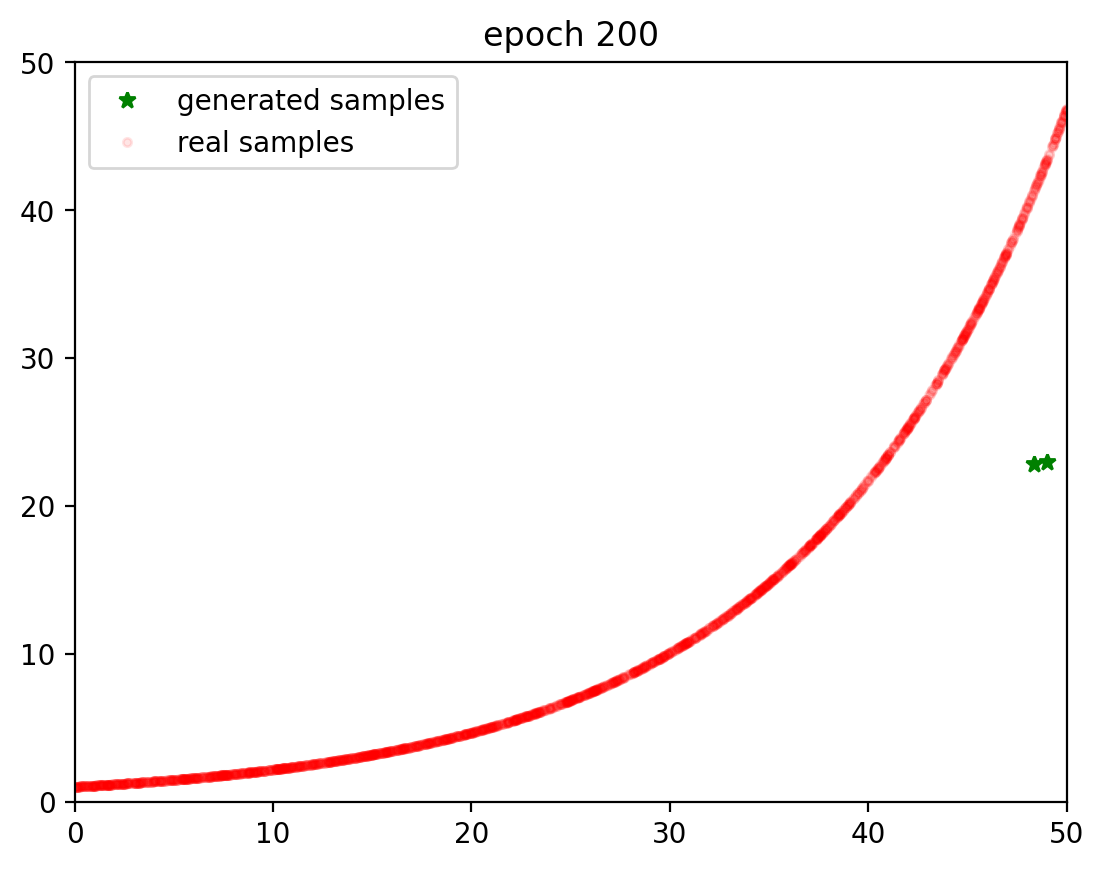

at epoch 225, G loss: 5.053892517089844, D loss 0.39767395655314125


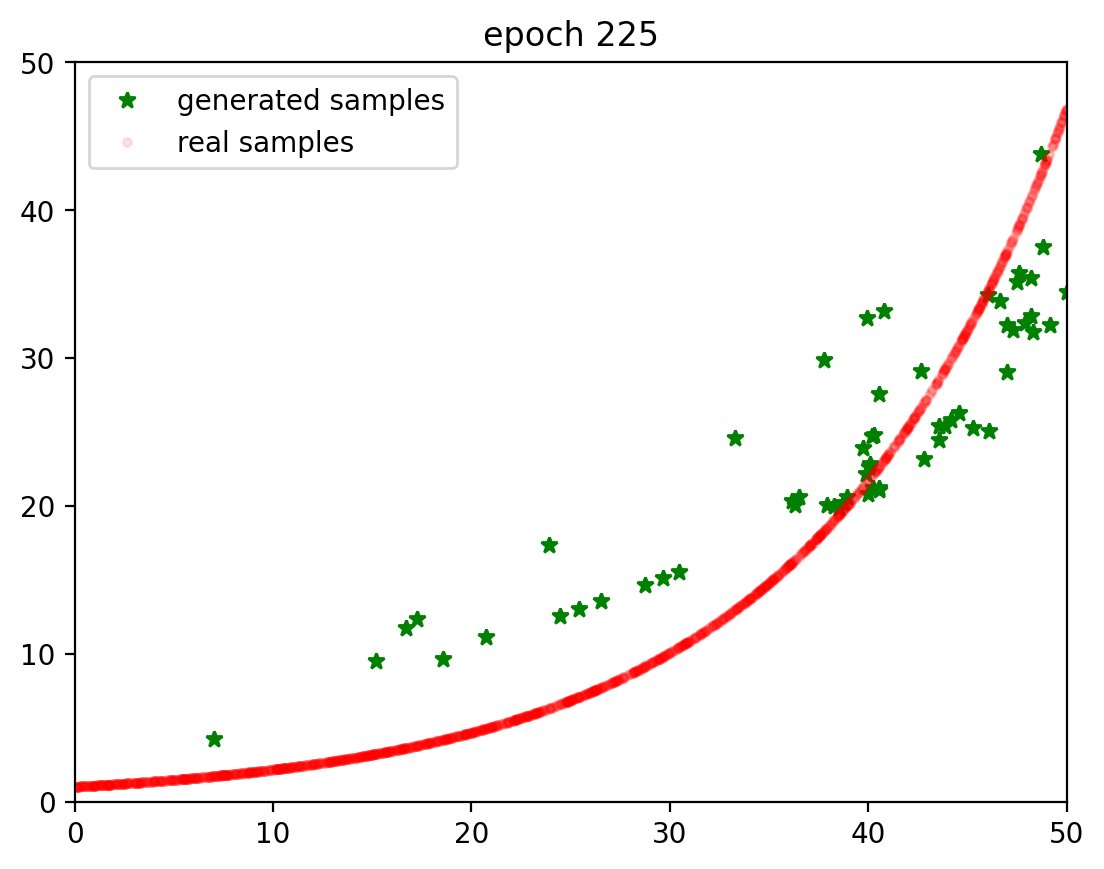

at epoch 250, G loss: 6.1086980183919275, D loss 0.23149892489115398


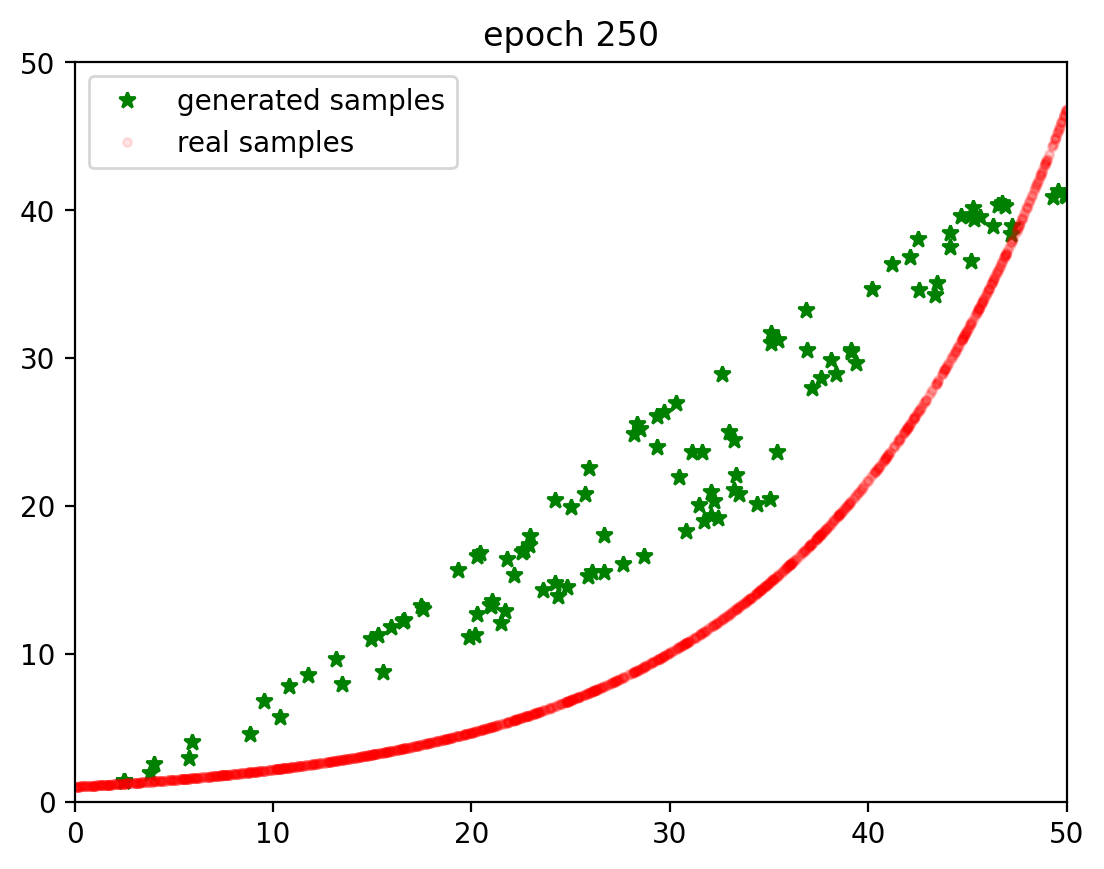

at epoch 275, G loss: 5.312335713704427, D loss 0.35788358052571617


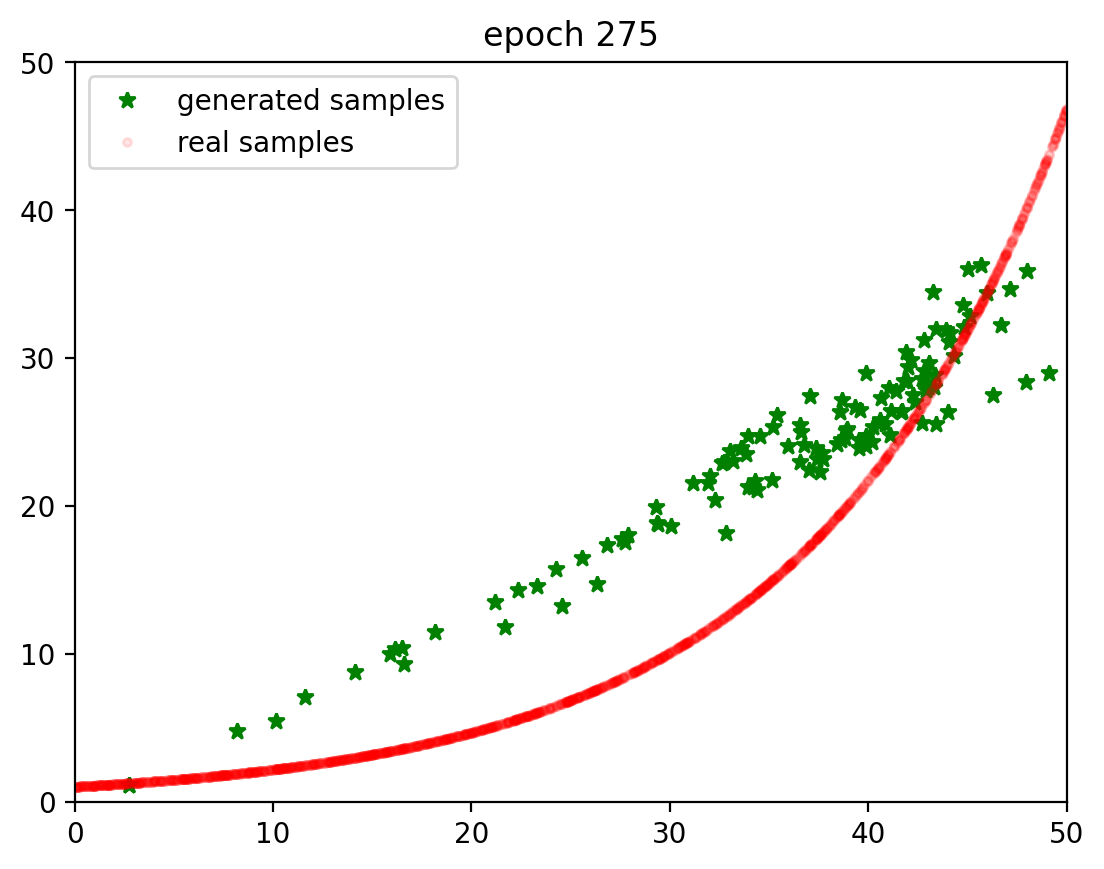

at epoch 300, G loss: 8.533359781901042, D loss 0.10239874521891276


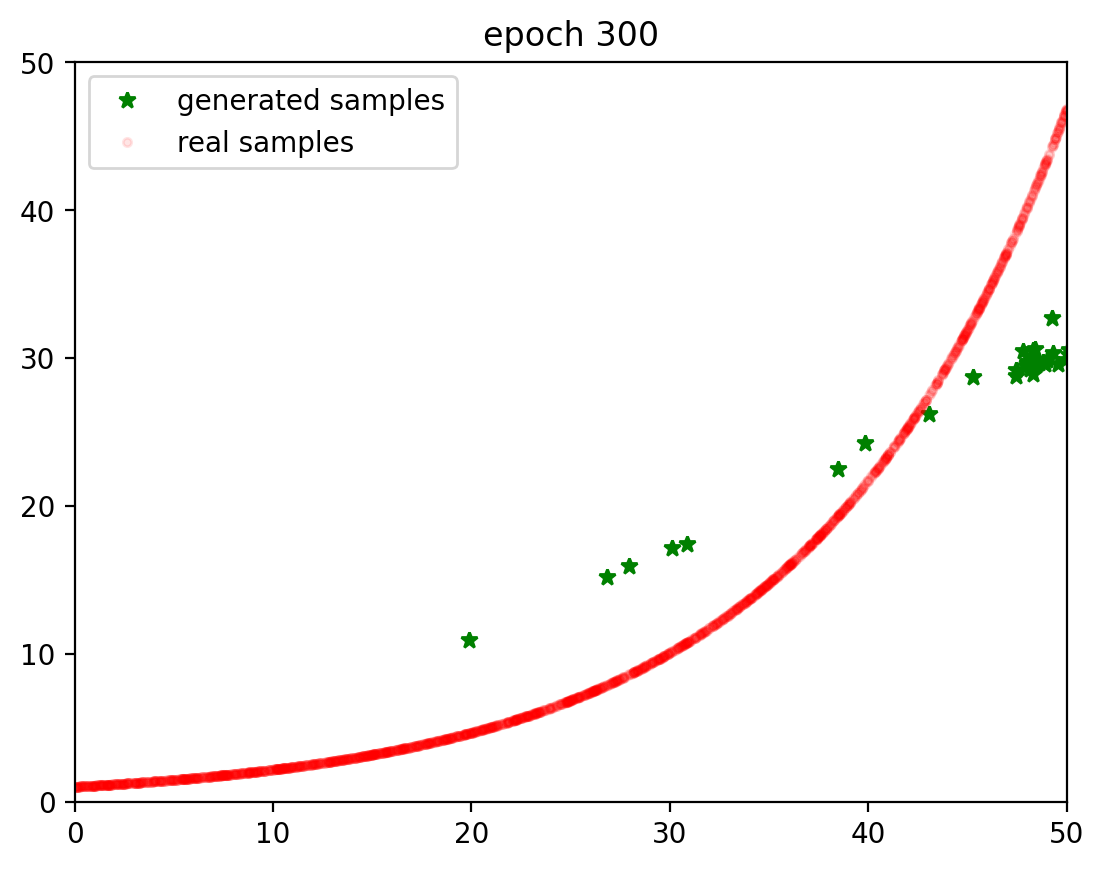

at epoch 325, G loss: 6.121649678548177, D loss 0.21857746442159018


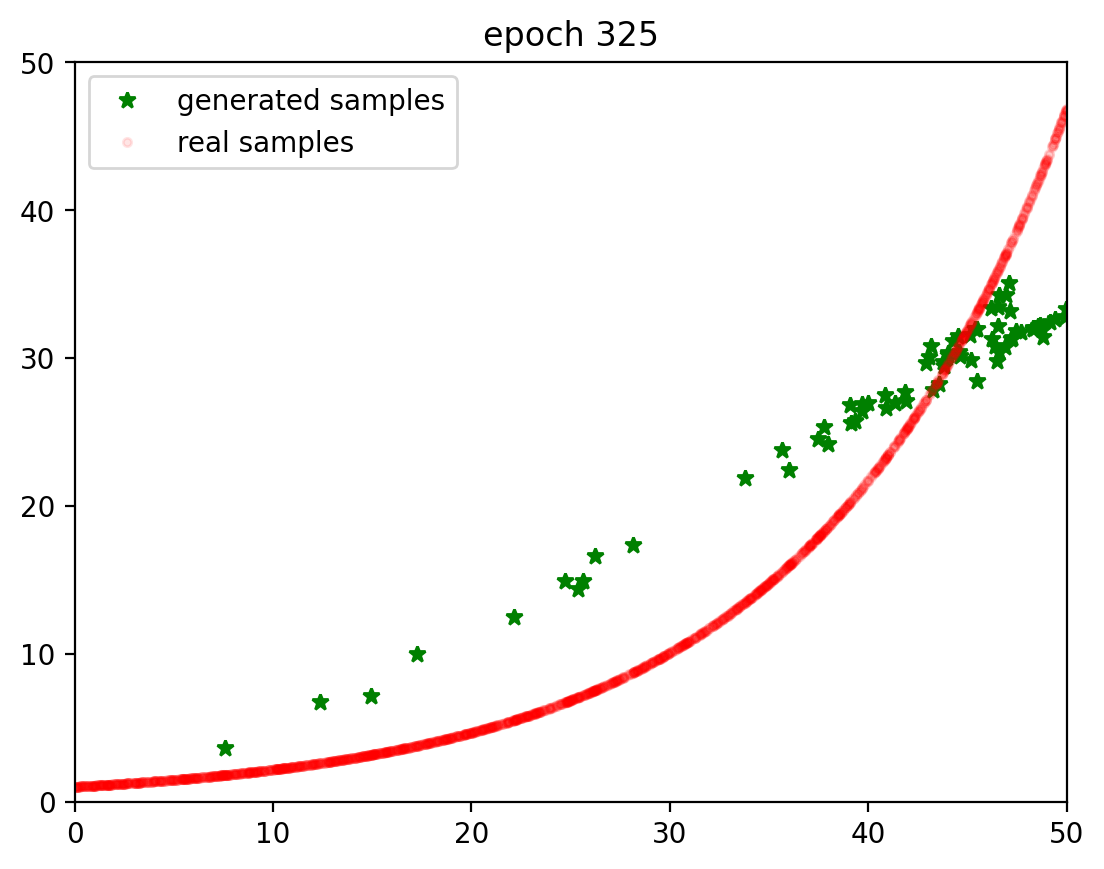

at epoch 350, G loss: 8.30802256266276, D loss 0.2233366012573242


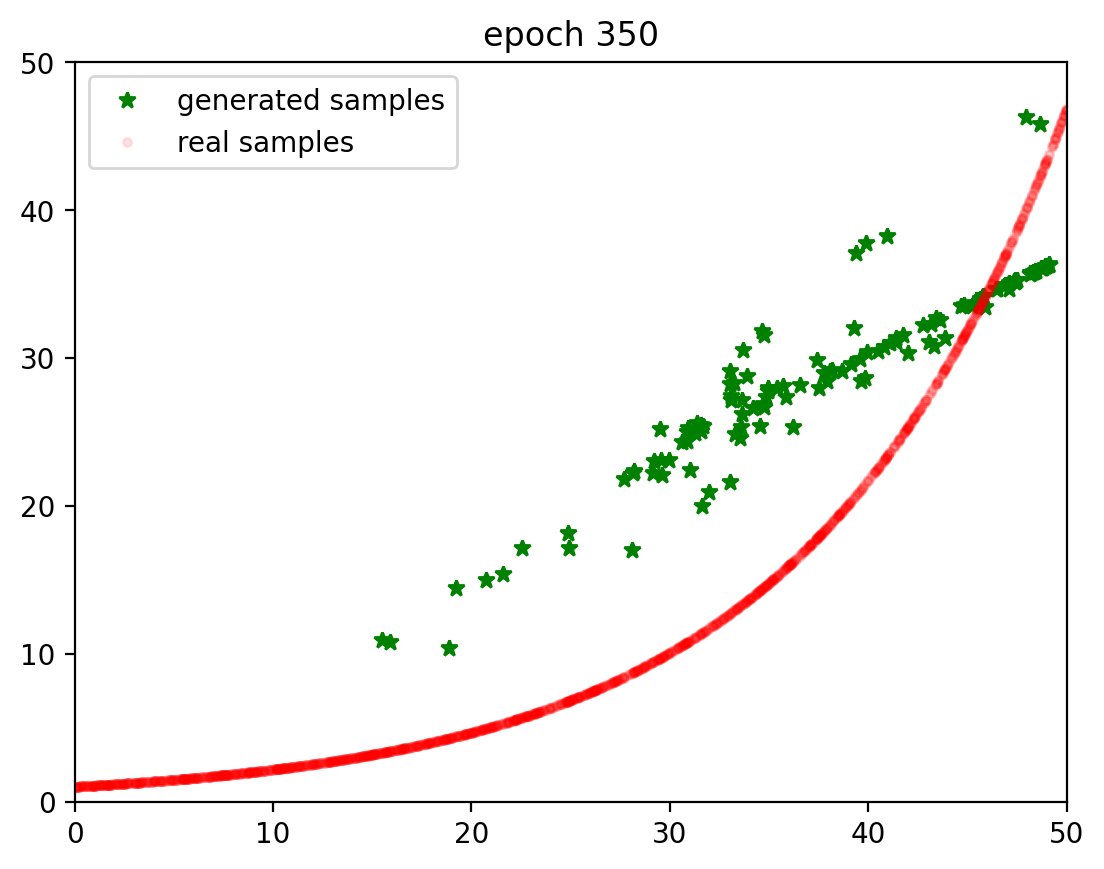

at epoch 375, G loss: 8.209193420410156, D loss 0.20028060277303059


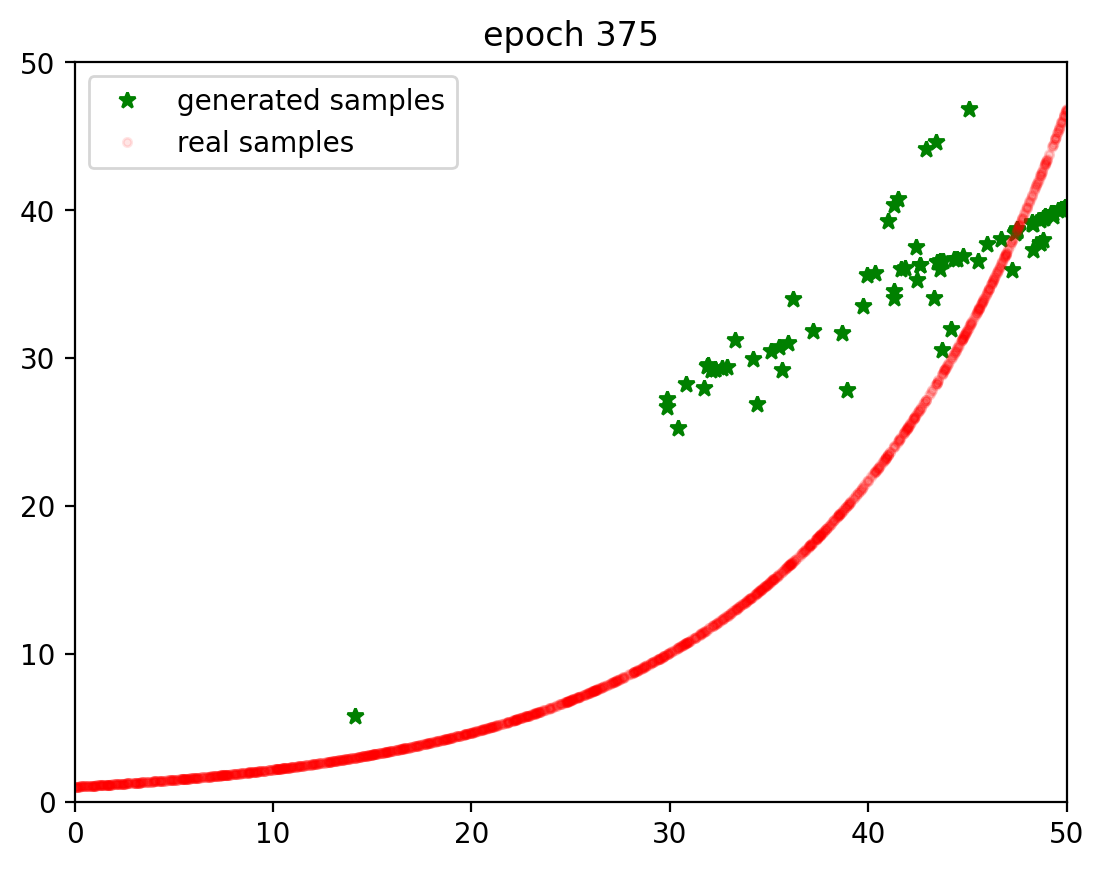

at epoch 400, G loss: 7.627153015136718, D loss 0.11590787569681803


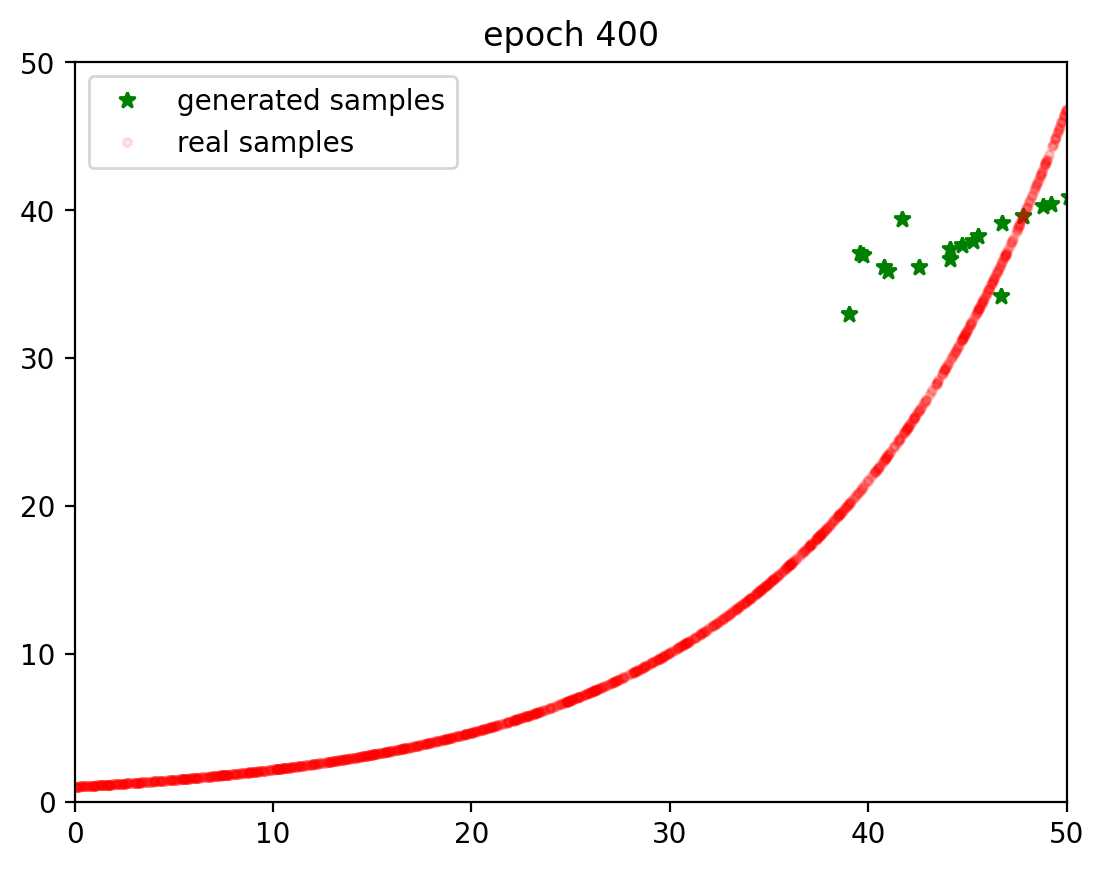

at epoch 425, G loss: 5.698603820800781, D loss 0.21652396519978842


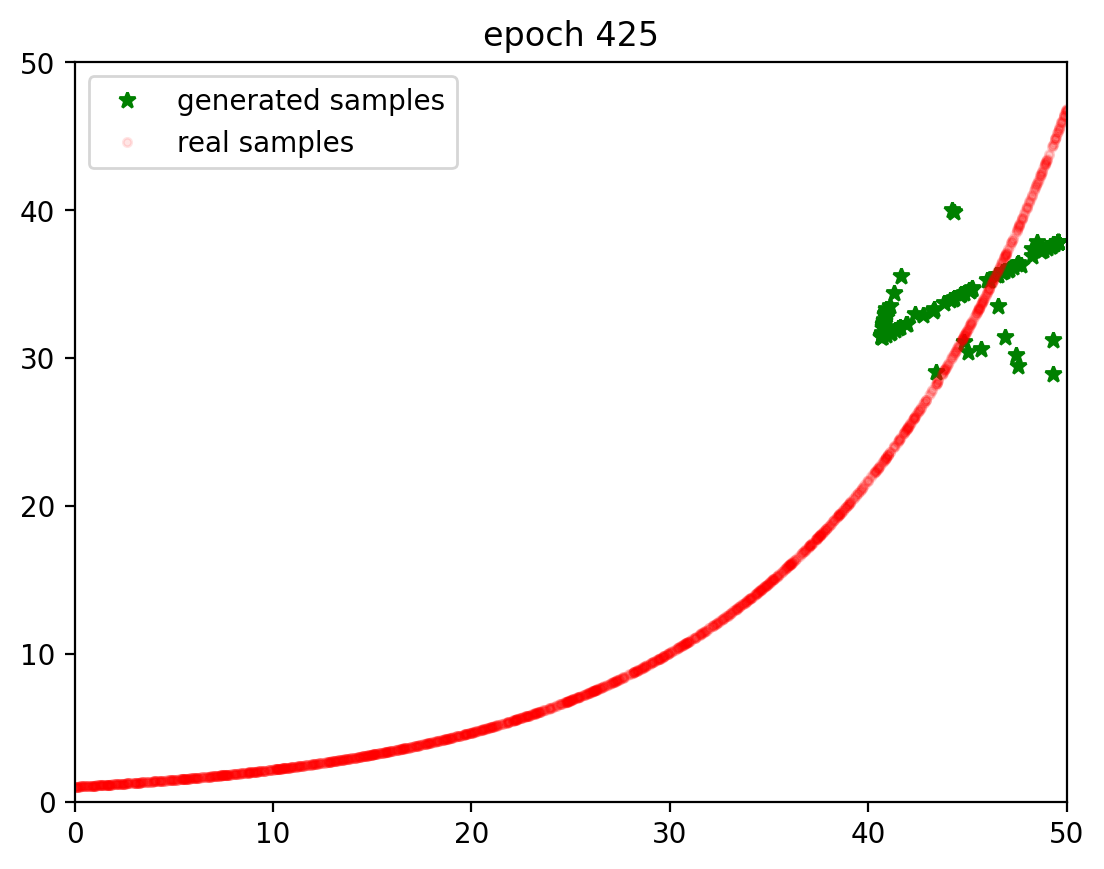

at epoch 450, G loss: 5.472111002604167, D loss 0.2818074544270833


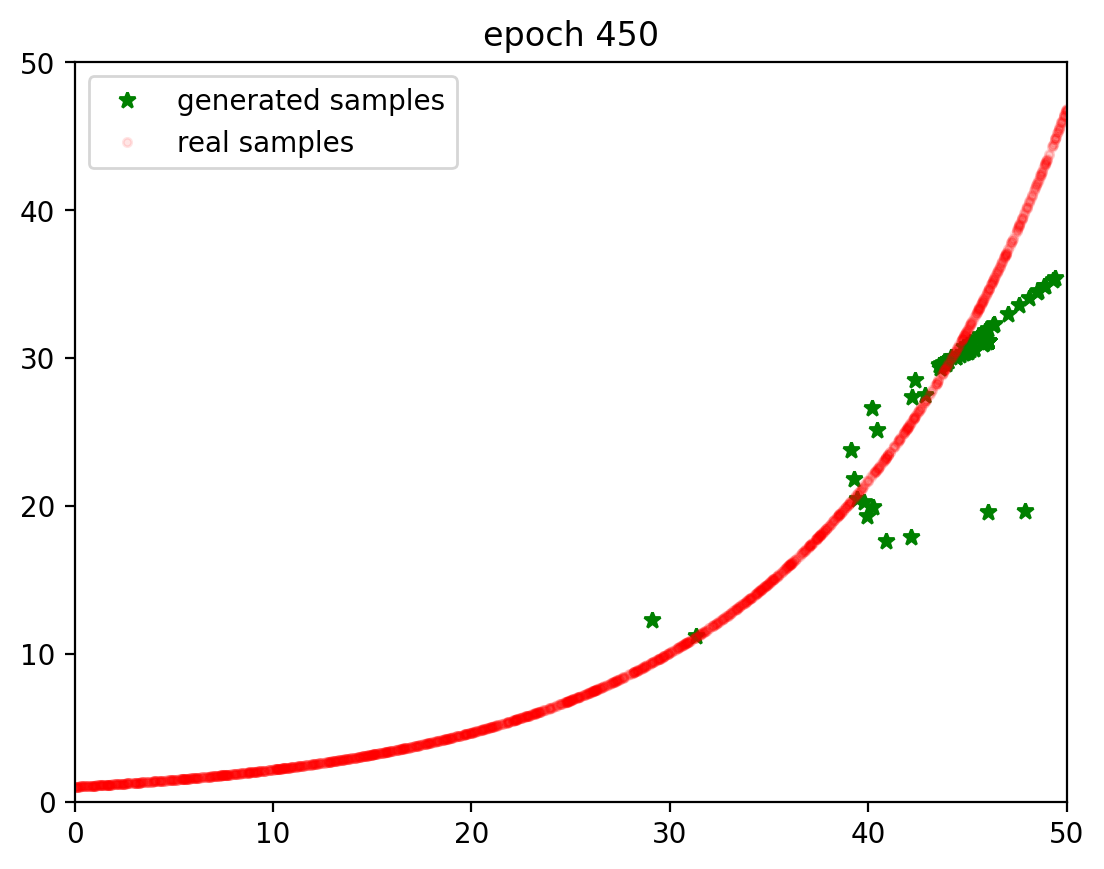

at epoch 475, G loss: 6.441652933756511, D loss 0.30406942367553713


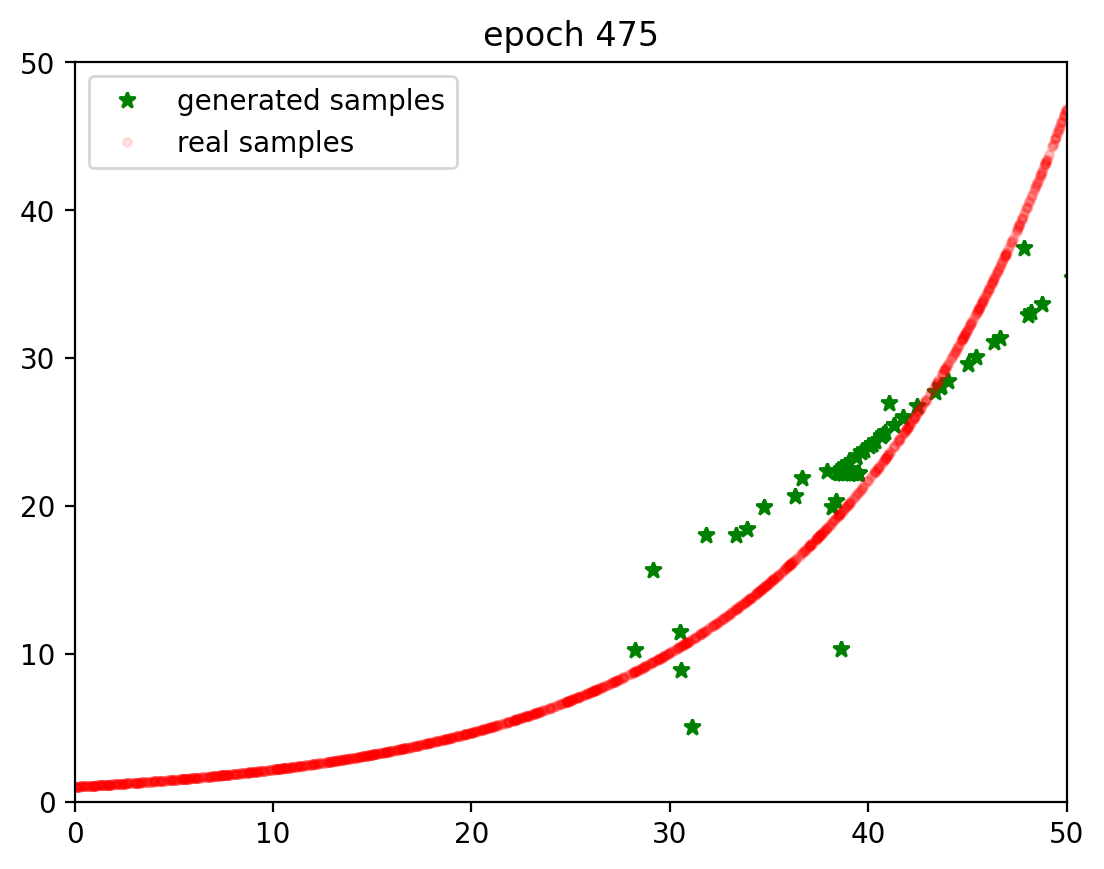

at epoch 500, G loss: 6.955592346191406, D loss 0.4570398012797038


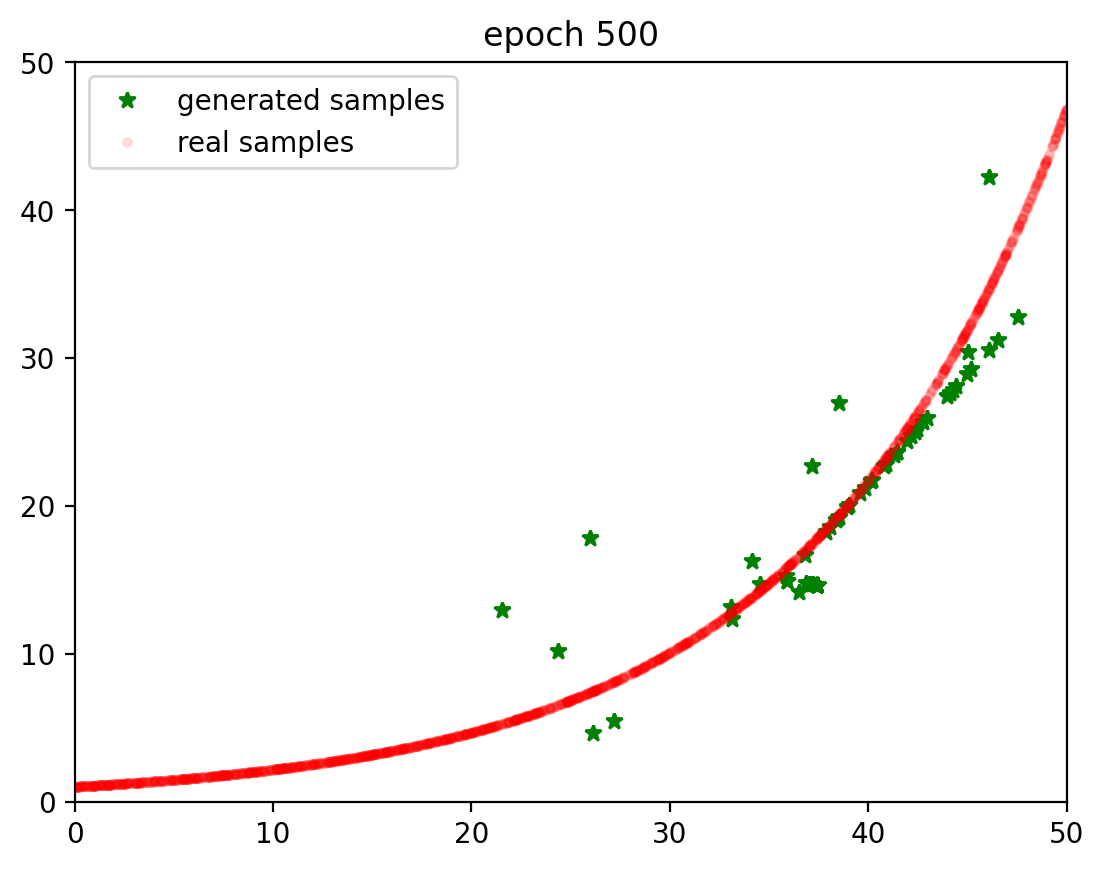

at epoch 525, G loss: 14.840928141276041, D loss 0.1910962422688802


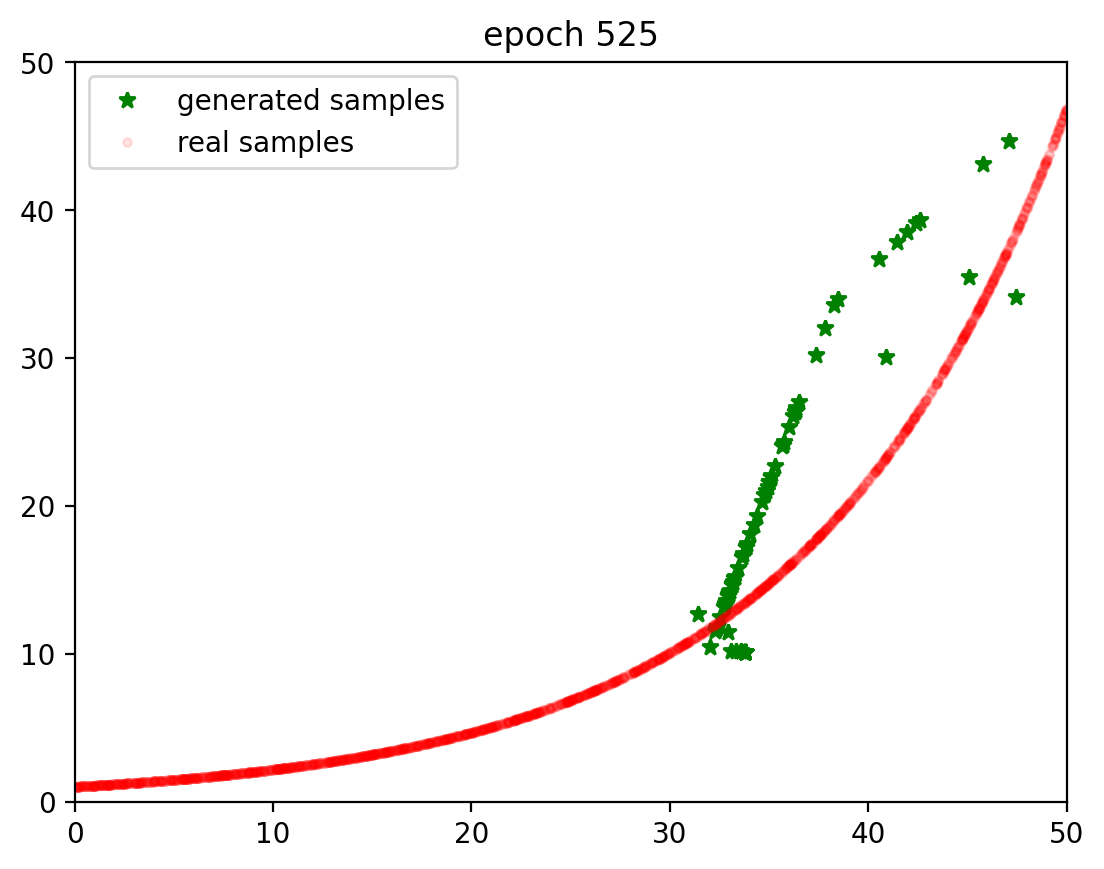

at epoch 550, G loss: 12.922958374023438, D loss 0.1514047622680664


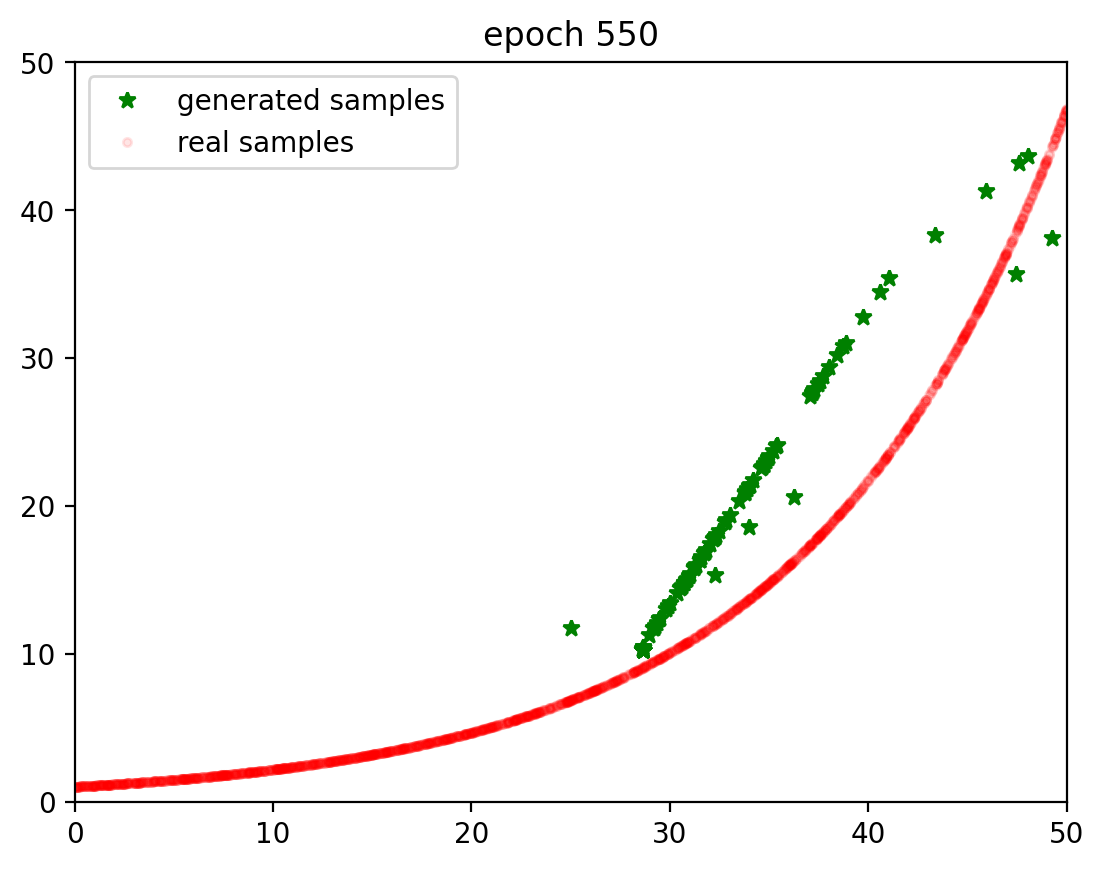

at epoch 575, G loss: 20.013193766276043, D loss 0.027866411209106445


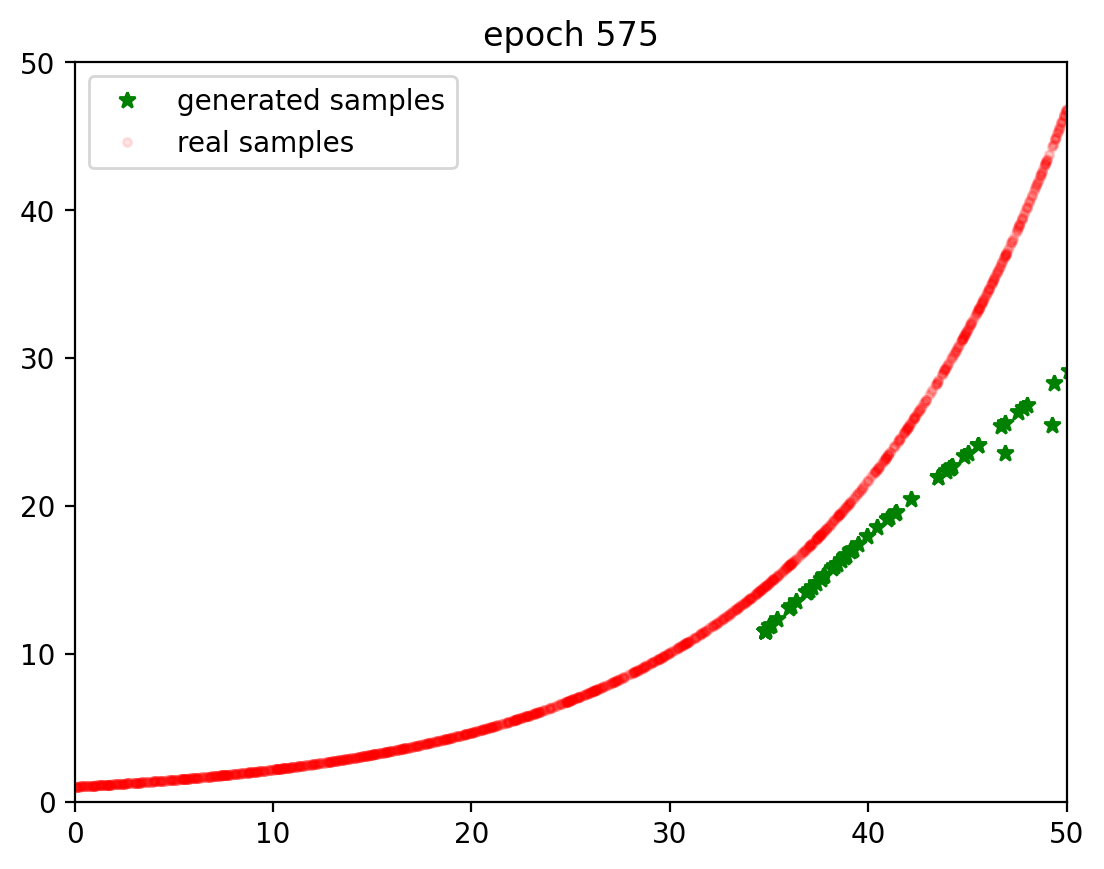

at epoch 600, G loss: 21.479848225911457, D loss 0.003488459686438243


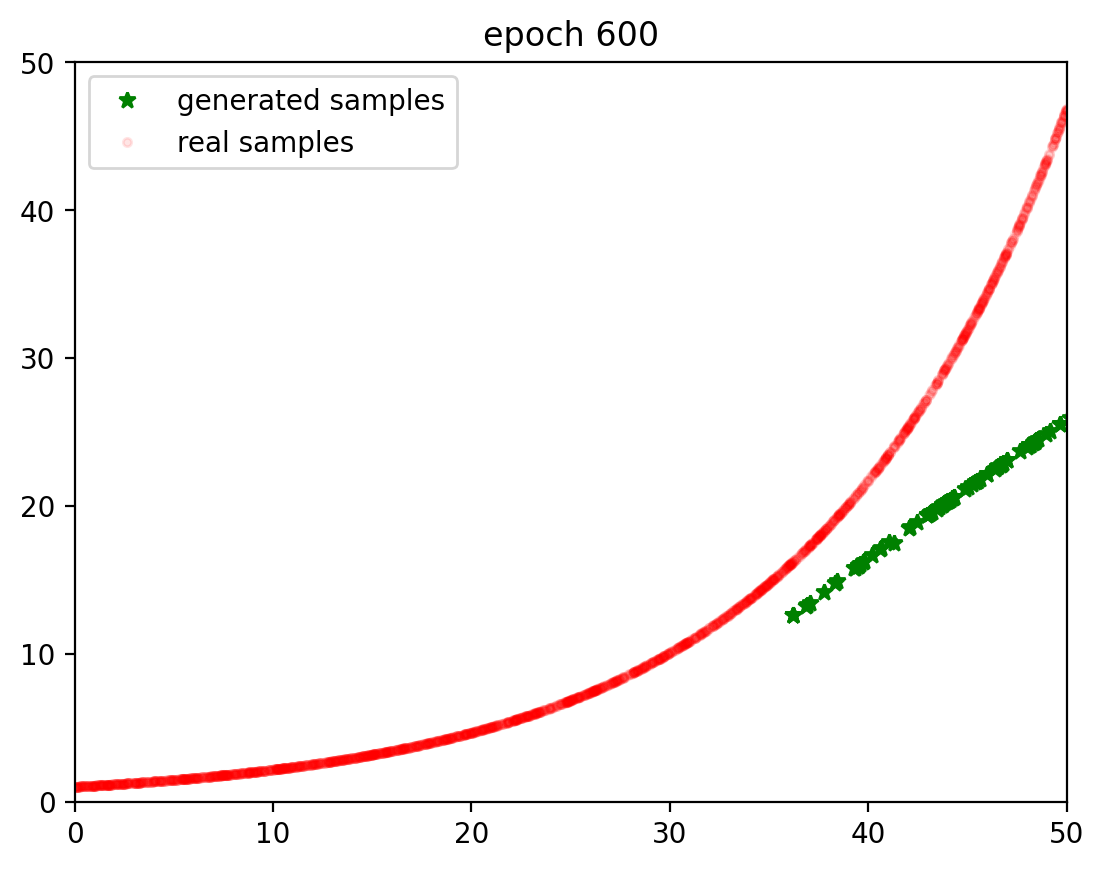

at epoch 625, G loss: 13.522145589192709, D loss 0.1324174404144287


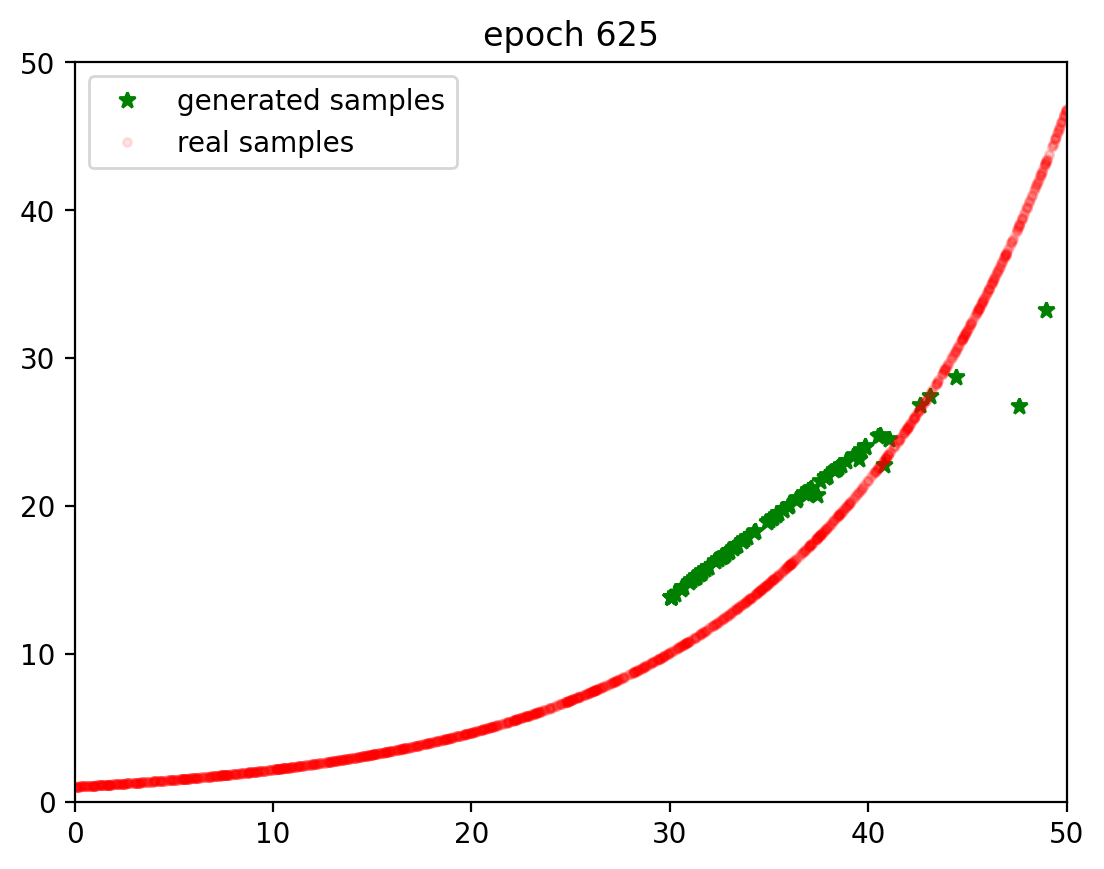

at epoch 650, G loss: 15.548811848958334, D loss 0.06271170775095622


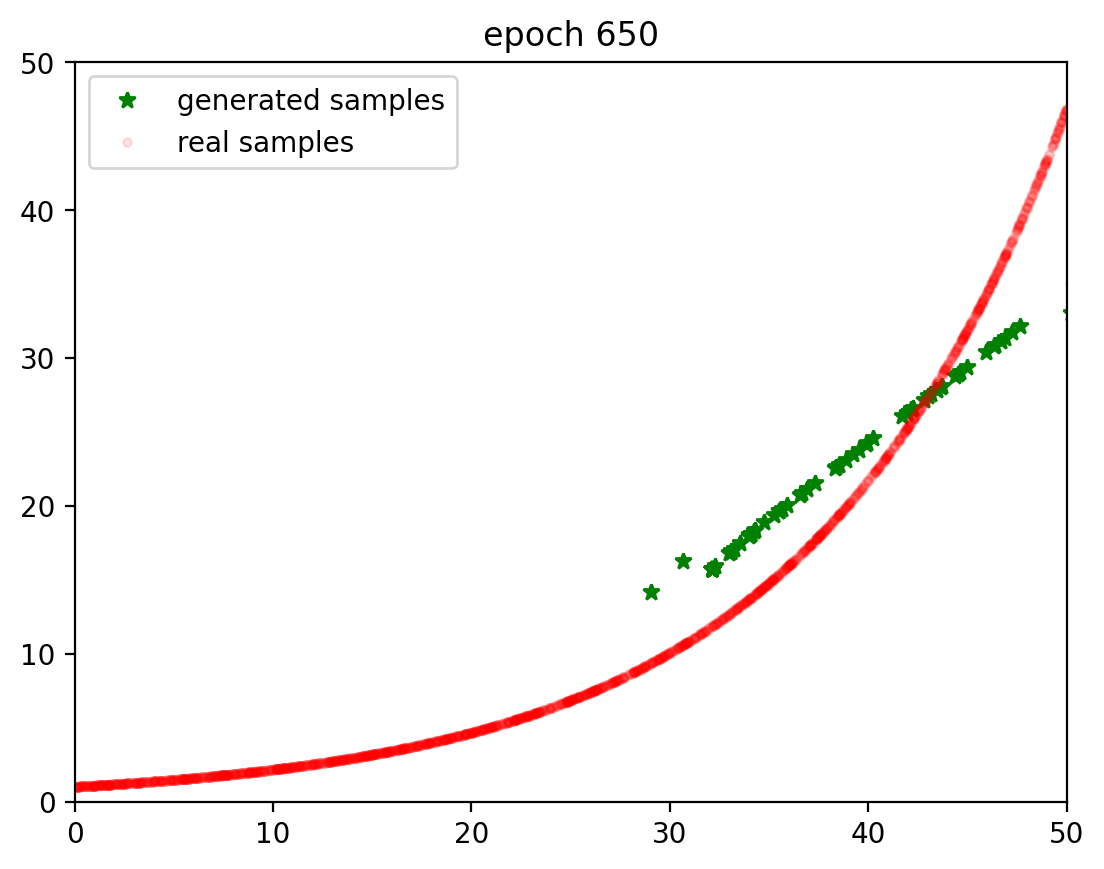

at epoch 675, G loss: 22.950815836588543, D loss 0.03831502596537272


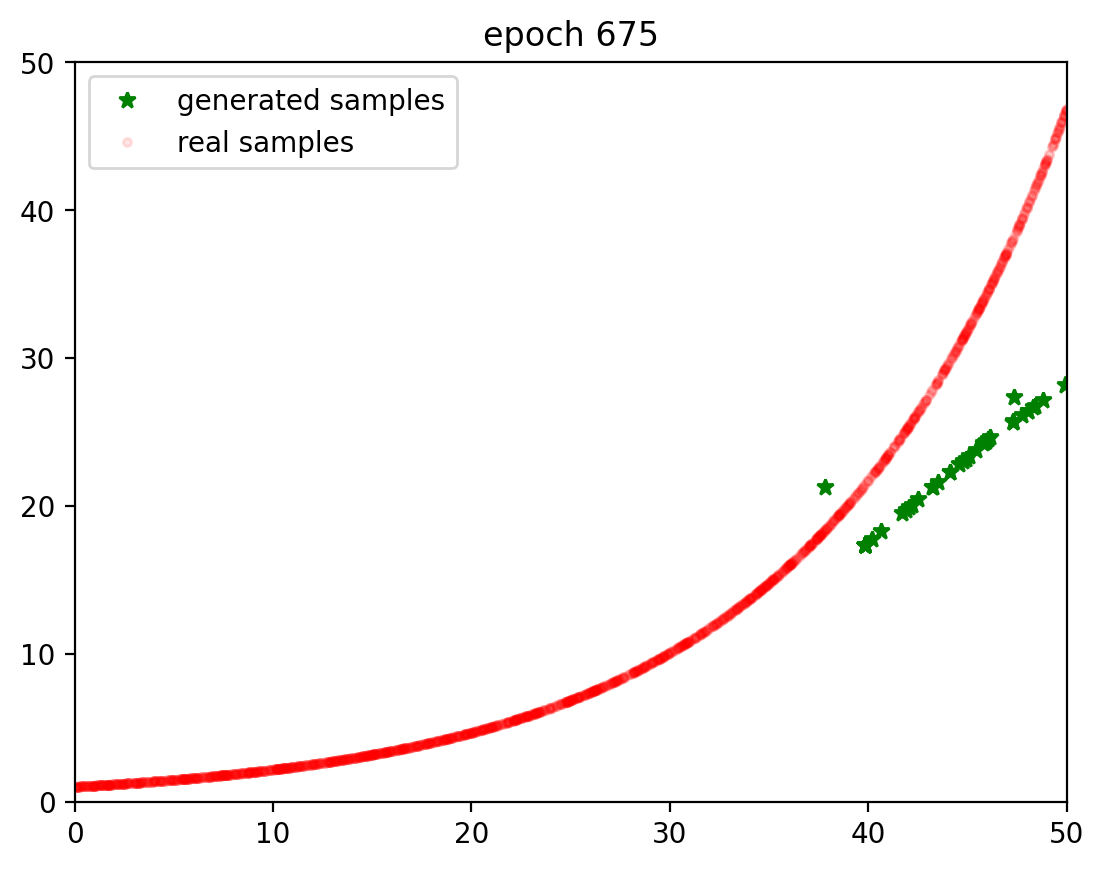

at epoch 700, G loss: 23.374357096354167, D loss 0.04137716690699259


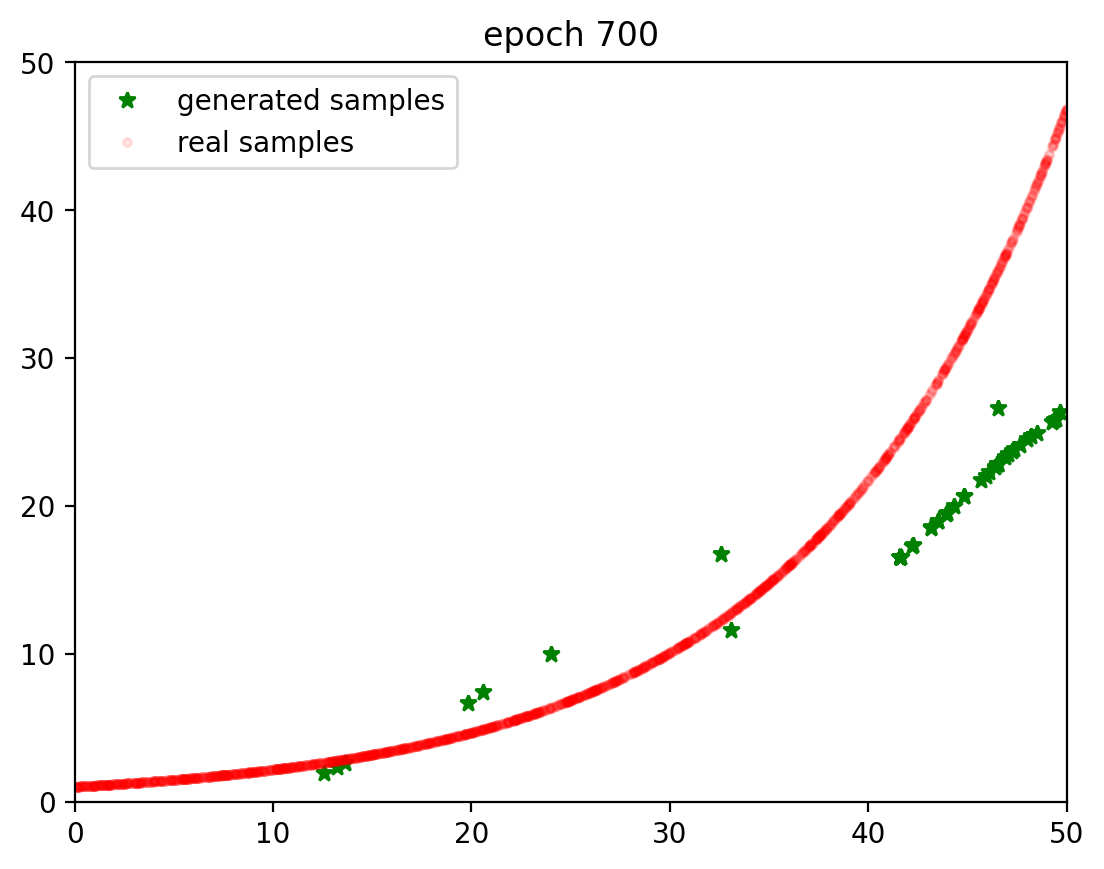

at epoch 725, G loss: 4.810553487141927, D loss 0.4927782376607259


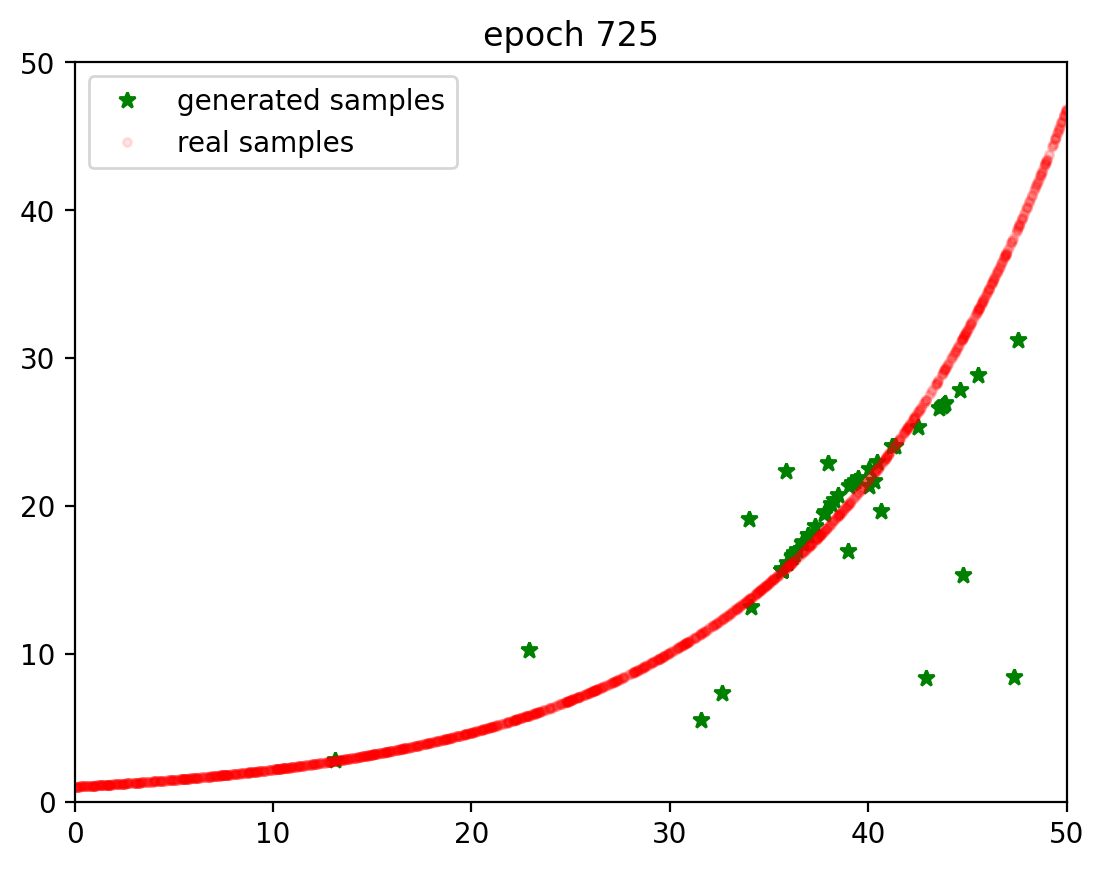

at epoch 750, G loss: 18.88576863606771, D loss 0.05219688415527344


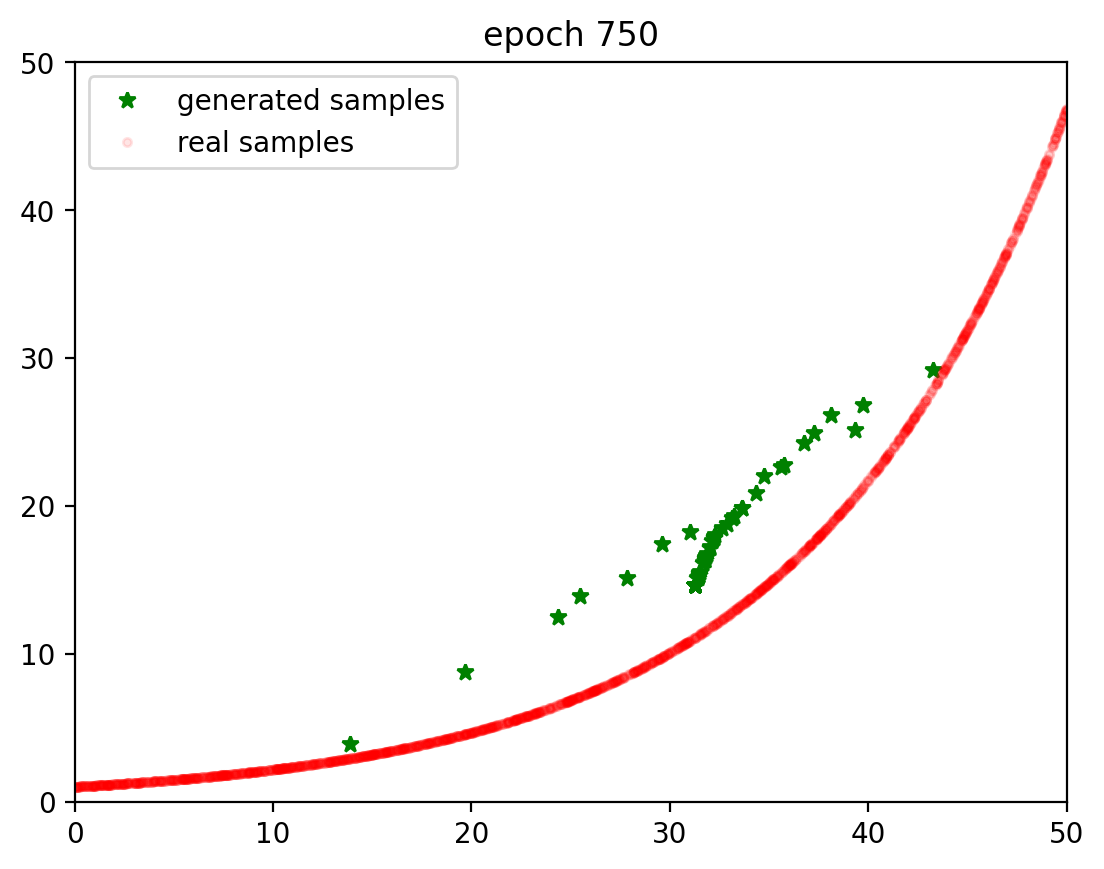

at epoch 775, G loss: 5.8040410359700525, D loss 0.3061973571777344


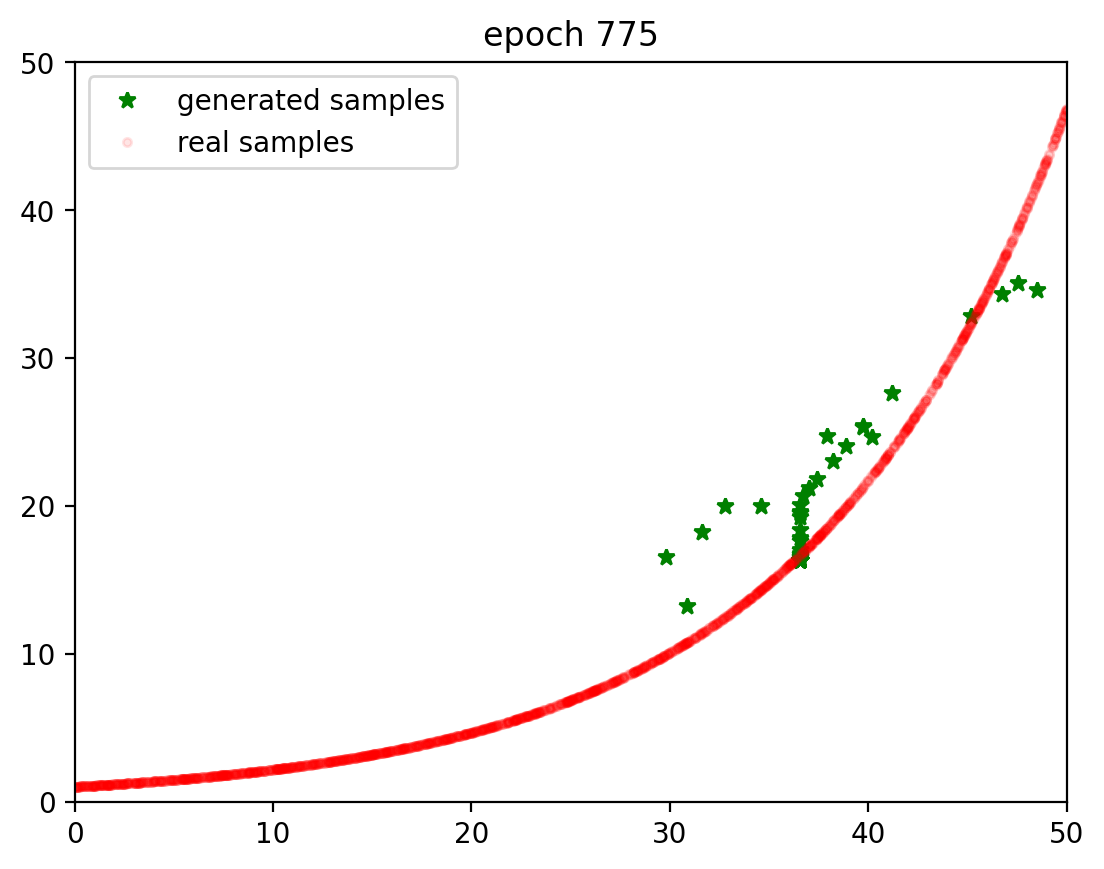

at epoch 800, G loss: 22.409090169270833, D loss 0.1344788392384847


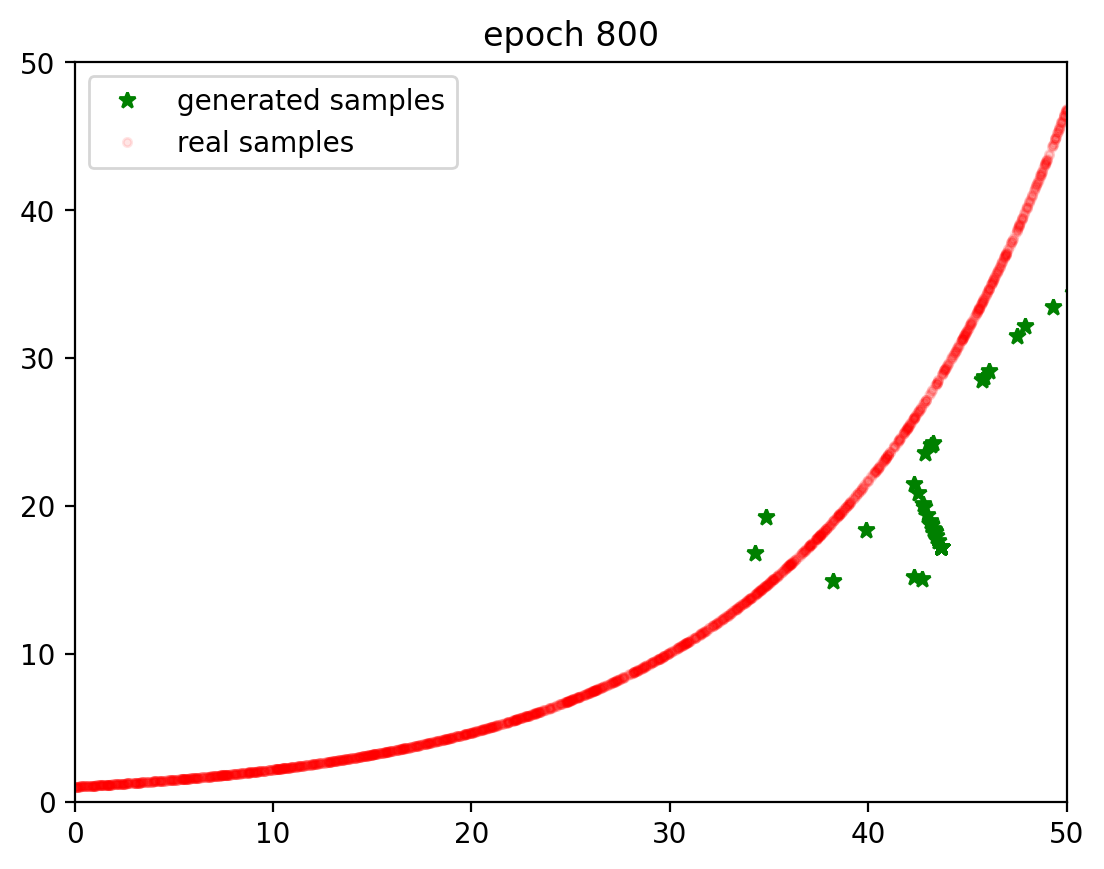

at epoch 825, G loss: 35.996602376302086, D loss 0.06033025979995728


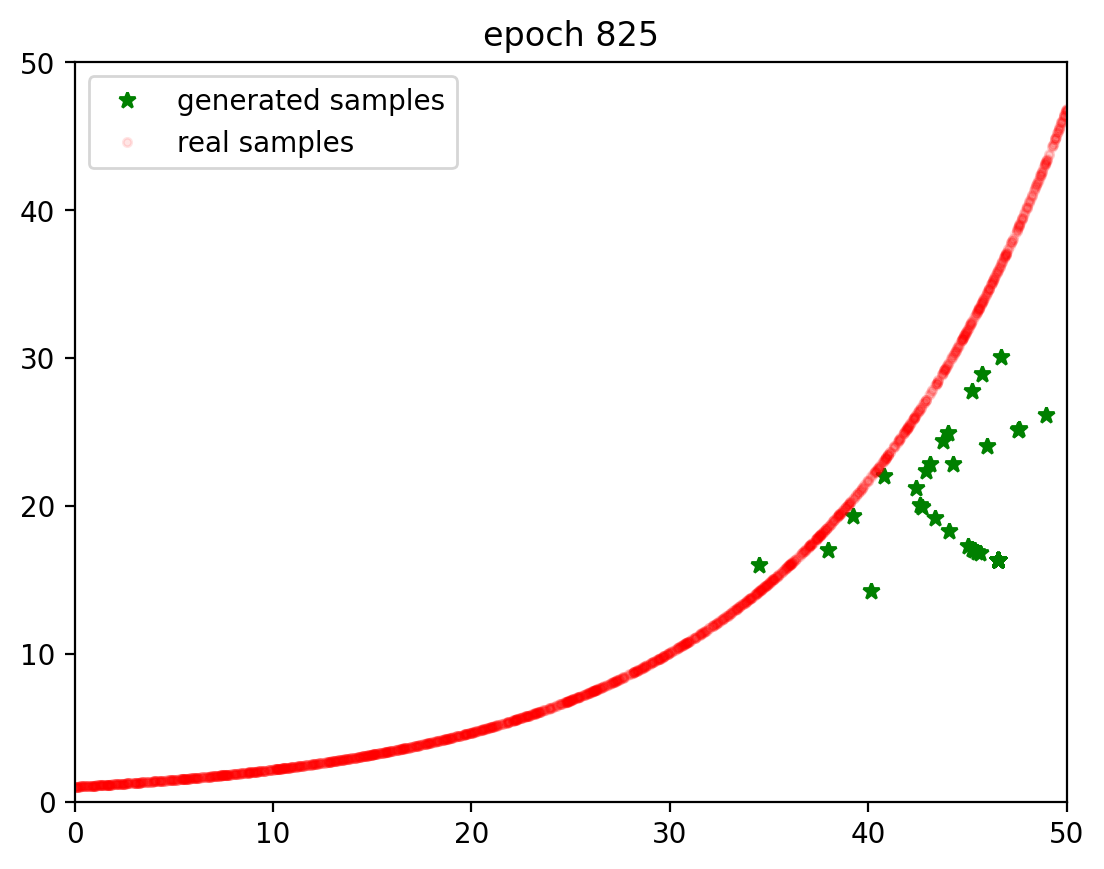

at epoch 850, G loss: 43.61640218098958, D loss 0.17477102279663087


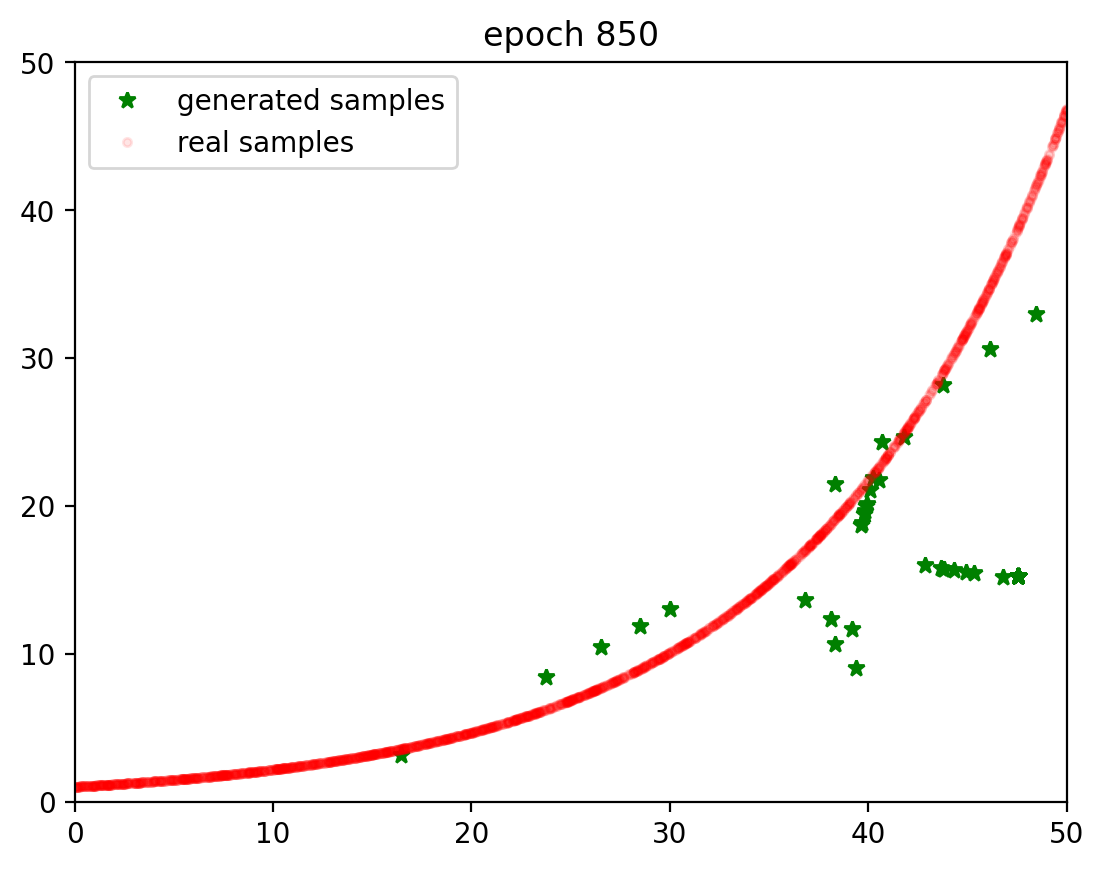

at epoch 875, G loss: 47.86081136067708, D loss 0.16673951148986815


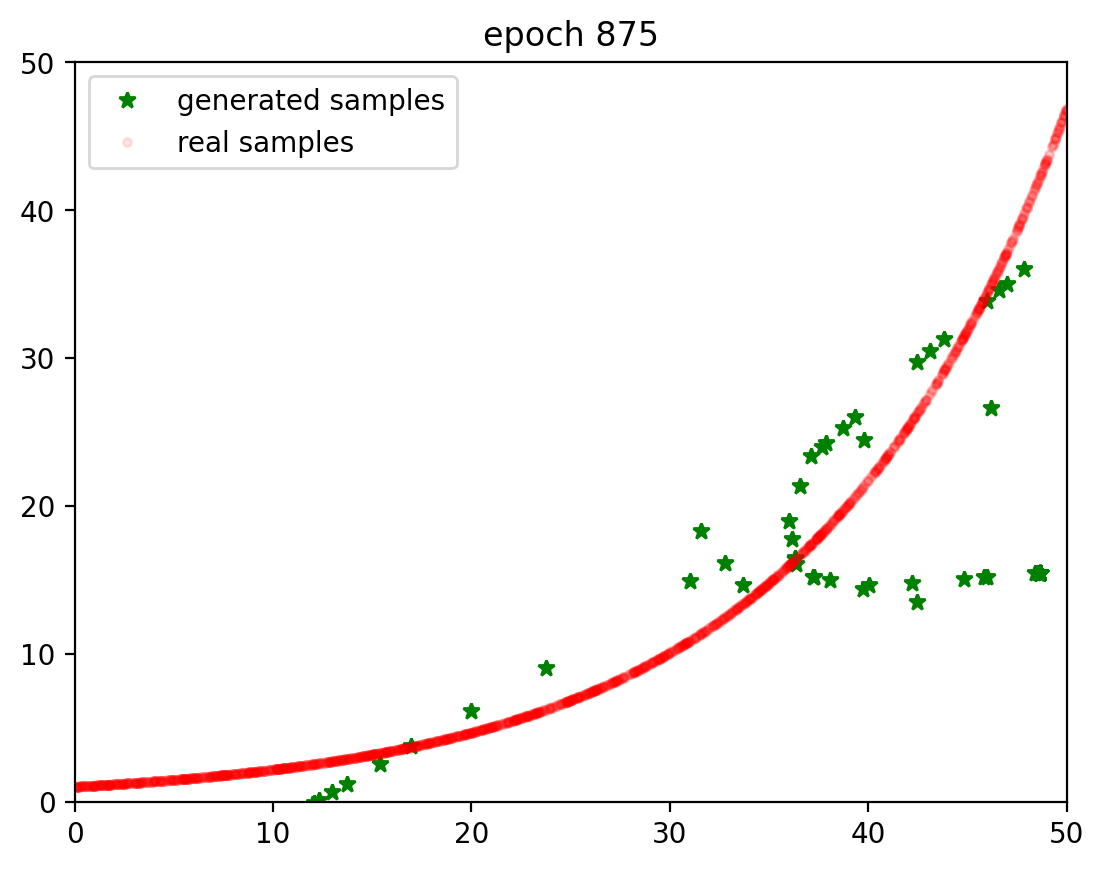

at epoch 900, G loss: 44.97820231119792, D loss 0.16888869603474935


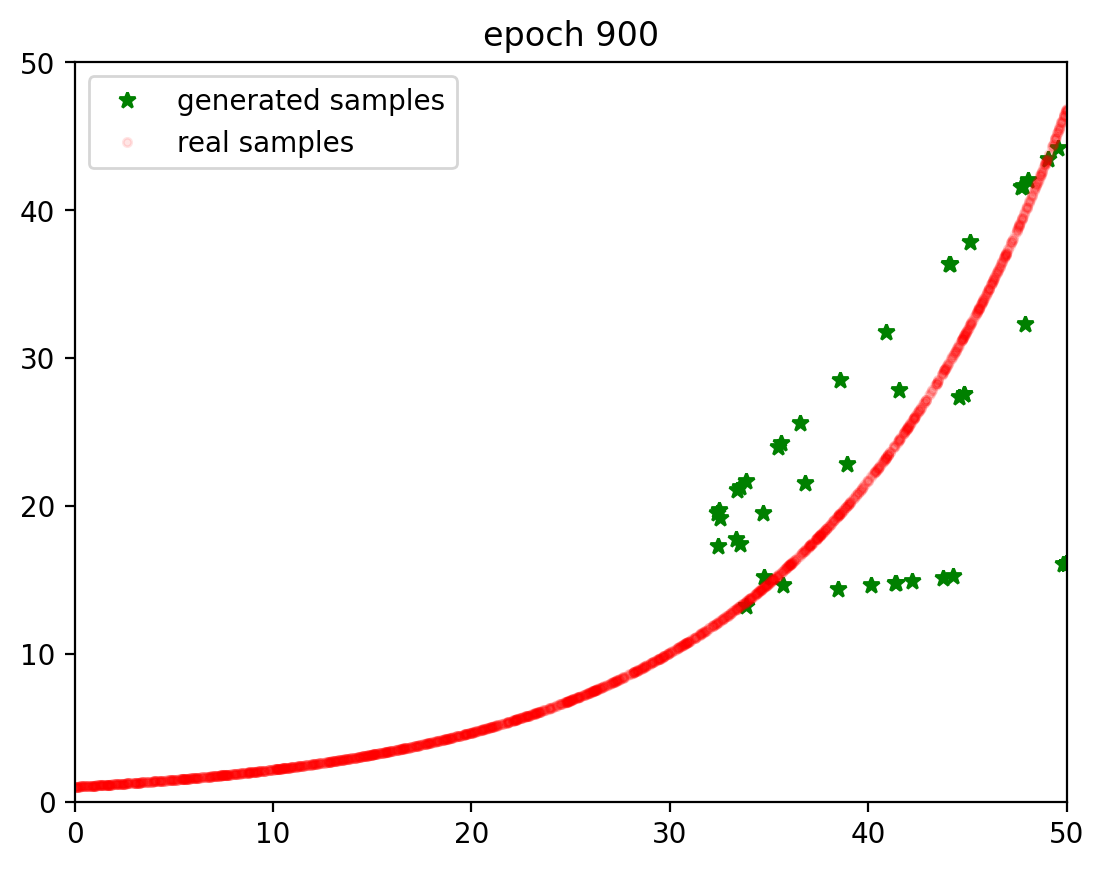

at epoch 925, G loss: 49.300435384114586, D loss 0.14777812957763672


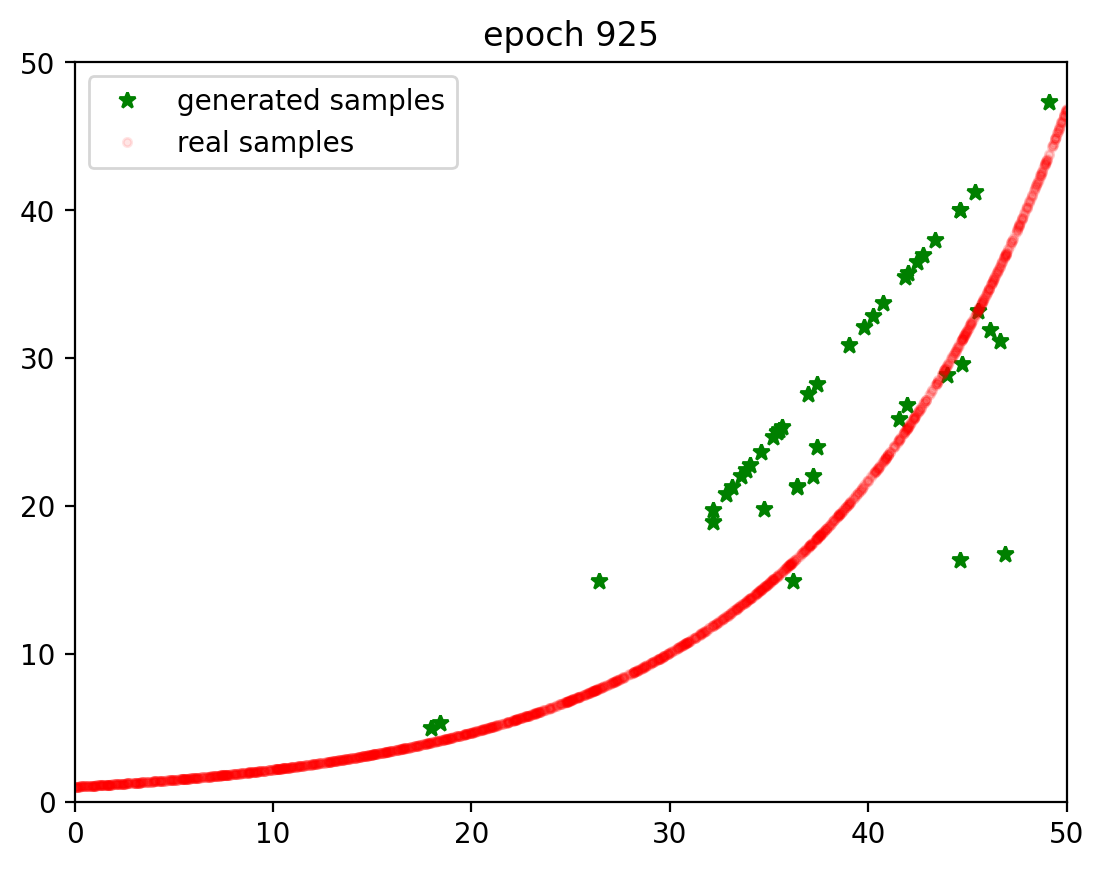

at epoch 950, G loss: 41.63416341145833, D loss 0.23411545753479004


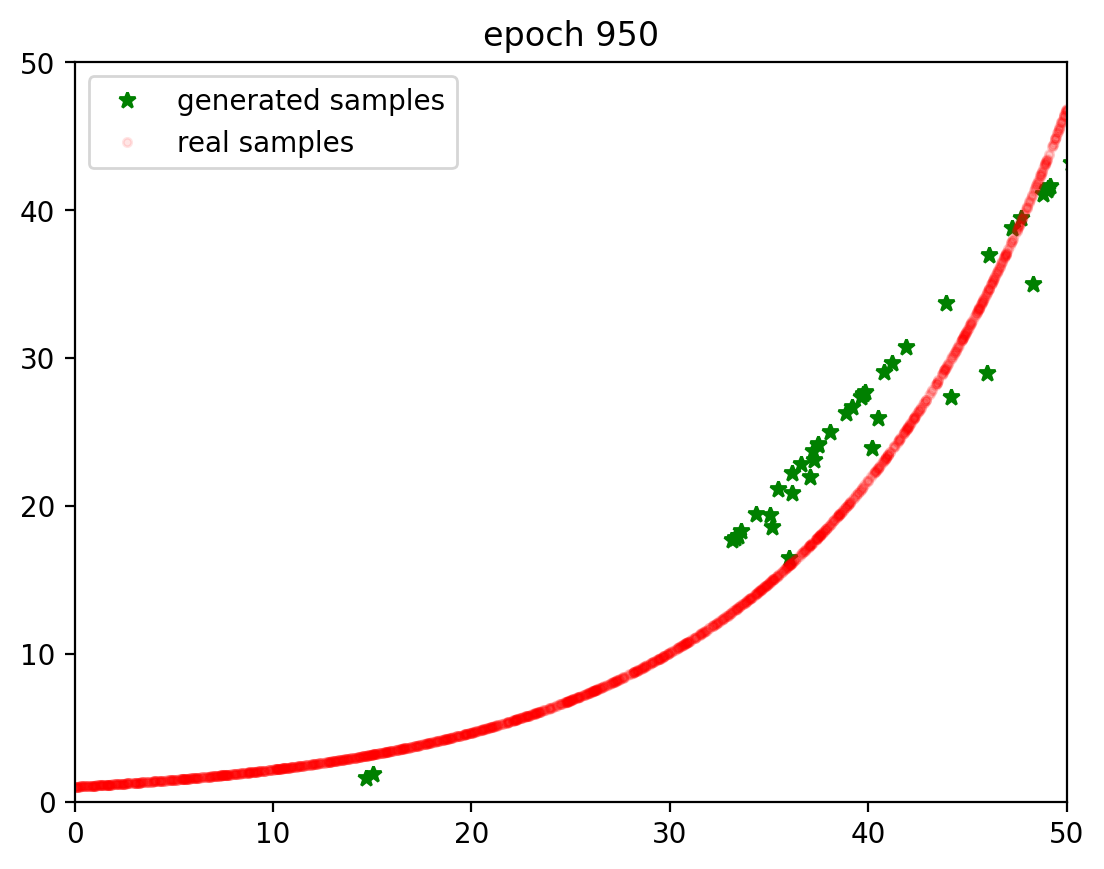

at epoch 975, G loss: 39.3244140625, D loss 0.14527649879455568


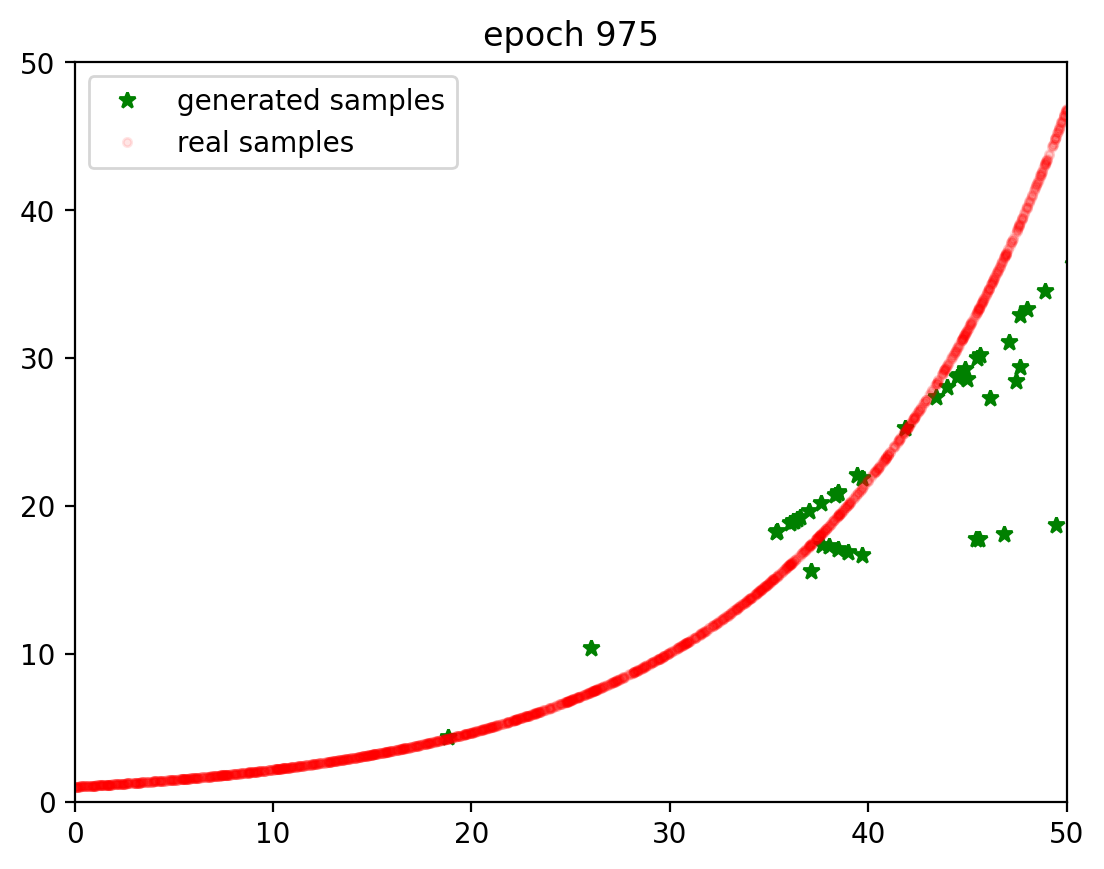

at epoch 1000, G loss: 39.94062093098958, D loss 0.1462050755818685


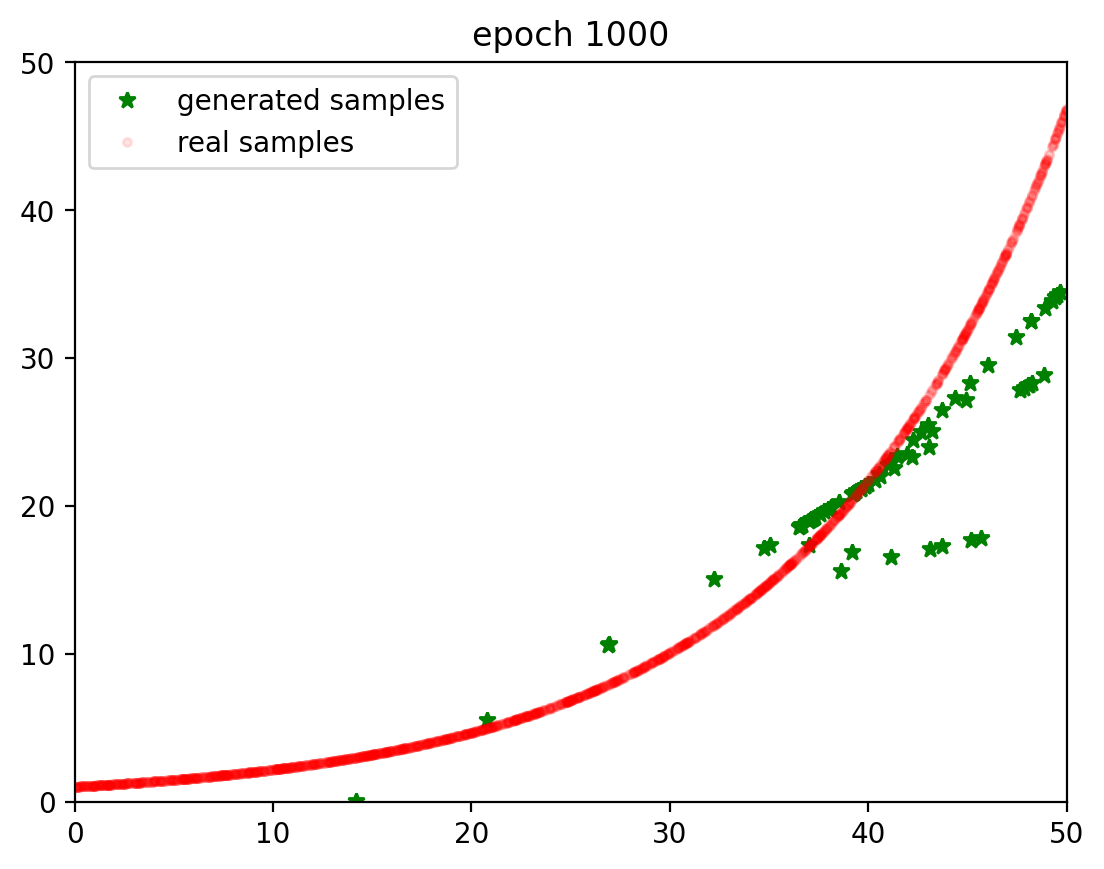

In [7]:
def train_D_on_real(real_samples):
    real_samples = real_samples.to(device)
    optimD.zero_grad()
    out_D = D(real_samples)
    loss_D = loss_fn(out_D, real_labels)
    loss_D.backward()
    optimD.step()
    return loss_D 

def train_D_on_fake():
    noise = torch.randn((batch_size, 2))
    noise = noise.to(device)
    fake_samples = G(noise)
    optimD.zero_grad()
    out_D = D(fake_samples)
    loss_D = loss_fn(out_D, fake_labels)
    loss_D.backward()
    optimD.step()
    return loss_D

def train_G():
    noise = torch.randn((batch_size, 2))
    noise = noise.to(device)
    fake_samples = G(noise)
    out_G = D(fake_samples)
    loss_G = loss_fn(out_G, real_labels)
    loss_G.backward()
    optimG.step()
    return loss_G, fake_samples 


import os 
os.makedirs("files", exist_ok=True)

def test_epoch(epoch, gloss, dloss, n, fake_samples):
    if epoch == 0 or (epoch+1) % 25 == 0:
        g = gloss.item() / n 
        d = dloss.item() / n 
        print(f"at epoch {epoch+1}, G loss: {g}, D loss {d}")
        fake = fake_samples.detach().cpu().numpy()
        plt.figure(dpi=200)
        plt.plot(fake[:,0],fake[:,1],"*",c="g",
            label="generated samples")    #C
        plt.plot(train_data[:,0],train_data[:,1],".",c="r",
            alpha=0.1,label="real samples")    #D
        plt.title(f"epoch {epoch+1}")
        plt.xlim(0,50)
        plt.ylim(0,50)
        plt.legend()
        plt.savefig(f"files/p{epoch+1}.png")
        plt.show()

for epoch in range(10000):    #A
    gloss=0
    dloss=0
    for n, real_samples in enumerate(train_loader):    #B
        loss_D=train_D_on_real(real_samples)
        dloss+=loss_D
        loss_D=train_D_on_fake()
        dloss+=loss_D
        loss_G,fake_samples=train_G()
        gloss+=loss_G
    test_epoch(epoch,gloss,dloss,n,fake_samples)    #C
    gdif=performance(fake_samples).item()
    if stopper.stop(gdif)==True:    #D
        break

In [ ]:
import torch 

def onehot_encoder(position, depth):
    onehot = torch.zeros((depth,))
    onehot[position] = 1 
    return onehot 

print(onehot_encoder(1,5))

def int_to_onehot(number):
    onehot = onehot_encoder(number, 100)
    return onehot 

onehot75 = int_to_onehot(75)
print(onehot75) 

def onehot_to_int(onehot):
    num = torch.argmax(onehot)
    return num.item()

print(onehot_to_int(onehot75))

tensor([0., 1., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
75


In [ ]:
def gen_sequence():
    indices = torch.randint(0, 20, (10,))
    values = indices * 5 
    return values 

sequence = gen_sequence()
print(sequence)

import numpy as np 

def gen_batch():
    sequence = gen_sequence()
    batch = [int_to_onehot(i).numpy() for i in sequence]
    batch = np.array(batch)
    return torch.tensor(batch) 
batch = gen_batch()

def data_to_num(data):
    num = torch.argmax(data, dim=-1)
    return num 
numbers = data_to_num(batch)

from torch import nn 
D = nn.Sequential(
    nn.Linear(100, 1),
    nn.Sigmoid()
).to(device)

G = nn.Sequential(
    nn.Linear(100, 100),
    nn.ReLU()
).to(device)

loss_fn = nn.BCELoss()
lr = 0.0005 
optimD = torch.optim.Adam(D.parameters(), lr=lr)
optimG = torch.optim.Adam(G.parameters(), lr=lr)

real_labels = torch.ones((10,1)).to(device)
fake_labels = torch.ones((10,1)).to(device)

def train_D_G(D, G, loss_fn, optimD, optimG):
    true_data = gen_batch().to(device)

    preds = D(true_data)
    loss_D1 = loss_fn(preds, real_labels.reshape(10,1))
    optimD.zero_grad()
    loss_D1.backward()
    optimD.step()

    noise = torch.randn(10,100).to(device)
    generated_data = G(noise).detach() # <--- detach() is critical

    preds = D(generated_data)
    loss_D2 = loss_fn(preds, fake_labels.reshape(10,1))
    optimD.zero_grad()
    loss_D2.backward()
    optimD.step()

    noise=torch.randn(10,100).to(device)
    genrated_data = G(noise)
    
    preds = D(generated_data)
    loss_G = loss_fn(preds, real_labels.reshape(10,1))
    optimG.zero_grad()
    loss_G.backward()
    optimG.step()
    return generated_data

tensor([80, 50, 70, 40, 15, 95, 95, 55,  5, 10])


In [9]:
stopper=EarlyStop(800)    #A

mse=nn.MSELoss()
real_labels=torch.ones((10,1)).to(device)
fake_labels=torch.zeros((10,1)).to(device)
def distance(generated_data):    #B
    nums=data_to_num(generated_data)
    remainders=nums%5
    ten_zeros=torch.zeros((10,1)).to(device)
    mseloss=mse(remainders,ten_zeros)
    return mseloss

for i in range(10000):
    gloss=0
    dloss=0
    generated_data=train_D_G(D,G,loss_fn,optimD,optimG)    #C  
    dis=distance(generated_data)
    if stopper.stop(dis)==True:
        break   
    if i % 50 == 0:
        print(data_to_num(generated_data))    #D

d:\anaconda\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor([71, 93, 76, 77, 18, 70, 76, 21, 97, 54])
tensor([45, 28, 85, 82, 57, 17, 38, 77, 94, 66])
tensor([16, 82, 31, 83, 40, 51, 17, 84, 28, 62])
tensor([10, 57,  9, 81, 62,  9, 67, 33,  6, 93])
tensor([25, 70, 40, 92, 39, 98, 53, 98, 21, 97])
tensor([82, 54, 67, 55, 60, 74,  3, 57, 52, 73])
tensor([31, 18, 33, 68,  7, 56,  0,  6,  9, 25])
tensor([38, 90, 95, 31, 43, 53, 85, 91, 37, 49])
tensor([77, 44, 31, 70, 35, 22, 55, 56, 32, 97])
tensor([33, 75, 78,  5, 67, 19, 54, 34, 49, 52])
tensor([ 9, 33, 31, 73, 25,  9, 29, 36, 94, 23])
tensor([87,  8, 88,  1, 24, 31, 45, 57, 94, 60])
tensor([53,  7,  6, 70, 27, 37, 76, 20, 70, 20])
tensor([41, 23, 38, 55, 34, 53, 49, 67, 53, 41])
tensor([54, 86, 78, 87, 78, 28, 53, 16, 16, 52])
tensor([44,  0, 96,  7, 29, 22, 22, 89,  0, 69])
tensor([99, 80, 87, 44, 14, 67, 32, 91, 97,  7])
tensor([44, 96, 32,  9, 67, 20,  5, 75, 84, 24])
tensor([66, 36, 46, 17, 77,  3, 56, 35, 62, 49])
tensor([45, 31, 66, 28, 95, 58, 99, 28, 27, 35])
tensor([78, 13,  8, 